In [1]:
%matplotlib inline

import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import harmonypy
from cnmf import cNMF
import seaborn as sns
import yaml
from scipy.stats import pearsonr
from IPython.display import Image
from matplotlib.pyplot import rc_context

sys.path.append('../../../Code/')
from utils import read_dataset_log, match_columns

In [2]:
paths = {'Original': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.h5ad',
 'RNA_Varnorm_Harmony': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.WithBlood.20230927RNA.VarNorm.HVG.HarmonyGeneCorrect.h5ad',
 'RNA_HVG_List': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.WithBlood.20230927RNA.HVGlist.tsv',
 'Metadata': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.WithBlood.20230927metadata.tsv',
 'TP10K': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.WithBlood.20230927RNA.TP10K.h5ad'}

# Run cNMF

In [3]:
cnmfdir = '../../../Data/PerDataset/XTissueImmuneAtlas'
name = 'XTissue.20230927.WithBlood'

In [7]:
cnmf_count_fn = paths['RNA_Varnorm_Harmony']
cnmf_tpm_fn = paths['TP10K']
hvg_fn = paths['RNA_HVG_List']

jname = name
cnmfout = os.path.join(cnmfdir, name, 'log')

Ks = np.arange(15, 60)
n_iter = 20
num_per_node = 5

In [8]:
cnmf_obj = cNMF(output_dir=cnmfdir, name=name)

In [9]:
cnmf_obj.prepare(counts_fn=cnmf_count_fn, components=Ks,
                 n_iter=n_iter, tpm_fn=cnmf_tpm_fn, genes_file=hvg_fn, init='random')

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].


In [10]:
total_workers = int((len(Ks)*n_iter) / num_per_node)
total_workers

180

In [11]:
if not os.path.exists(cnmfout): os.mkdir(cnmfout)

basecmd = "export OMP_NUM_THREADS=6; cnmf factorize --name {name} --output-dir {outdir} --total-workers {tw} --worker-index {i}"
q = 'short'
other = '-R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]"'

for i in range(90):
    cmd = basecmd.format(name=name, outdir=cnmfdir, i=i, tw=total_workers)
    e = os.path.join(cnmfout, '{j}.{i}.err.txt').format(i=i, j=jname)
    o = os.path.join(cnmfout, '{j}.{i}.out.txt').format(i=i, j=jname)
    bsub_cmd = 'bsub -q {q} -J {j} -o {o} -e {e} {other} "{cmd}"'.format(q=q, j=jname, e=e, o=o, other=other, cmd=cmd)
    print(bsub_cmd)
    !{bsub_cmd}

bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.0.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.0.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "export OMP_NUM_THREADS=6; cnmf factorize --name XTissue.20230927.WithBlood --output-dir ../../../Data/PerDataset/XTissueImmuneAtlas --total-workers 180 --worker-index 0"
Job <881113> is submitted to queue <short>.
bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.1.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.1.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[

In [22]:
if not os.path.exists(cnmfout): os.mkdir(cnmfout)

basecmd = "export OMP_NUM_THREADS=6; cnmf factorize --name {name} --output-dir {outdir} --total-workers {tw} --worker-index {i}"
q = 'short'
other = '-R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]"'

for i in range(90, 180):
    cmd = basecmd.format(name=name, outdir=cnmfdir, i=i, tw=total_workers)
    e = os.path.join(cnmfout, '{j}.{i}.err.txt').format(i=i, j=jname)
    o = os.path.join(cnmfout, '{j}.{i}.out.txt').format(i=i, j=jname)
    bsub_cmd = 'bsub -q {q} -J {j} -o {o} -e {e} {other} "{cmd}"'.format(q=q, j=jname, e=e, o=o, other=other, cmd=cmd)
    print(bsub_cmd)
    !{bsub_cmd}

bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.90.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.90.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "export OMP_NUM_THREADS=6; cnmf factorize --name XTissue.20230927.WithBlood --output-dir ../../../Data/PerDataset/XTissueImmuneAtlas --total-workers 180 --worker-index 90"
Job <881285> is submitted to queue <short>.
bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.91.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.91.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "se

In [23]:
! bjobs

No unfinished job found


In [24]:
! bjobs | wc -l

No unfinished job found
0


In [25]:
len(Ks)

45

In [26]:
len(Ks)*n_iter

900

In [27]:
total_workers = int((len(Ks)*n_iter))
total_workers

900

In [32]:
import os
def worker_filter(iterable, worker_index, total_workers):
    return (p for i,p in enumerate(iterable) if (i-worker_index)%total_workers==0)

def load_df_from_npz(filename):
    with np.load(filename, allow_pickle=True) as f:
        obj = pd.DataFrame(**f)
    return obj

missing = []
run_params = load_df_from_npz(cnmf_obj.paths['nmf_replicate_parameters'])
for worker_i in range(total_workers):
    jobs_for_this_worker = worker_filter(range(len(run_params)), worker_i, total_workers)
    for idx in jobs_for_this_worker:
        p = run_params.iloc[idx, :]
        outfn = cnmf_obj.paths['iter_spectra'] % (p['n_components'], p['iter'])
        if not os.path.exists(outfn):
            print(worker_i, outfn)
            missing.append(worker_i)

697 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_49.iter_17.df.npz
699 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_49.iter_19.df.npz
700 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_50.iter_0.df.npz
705 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_50.iter_5.df.npz
706 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_50.iter_6.df.npz
708 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_50.iter_8.df.npz
709 ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/cnmf_tmp/XTissue.20230927.WithBlood.spectra.k_50.iter_9.df.npz
710 ../../../Data/PerDataset/XTi

In [33]:
len(missing)

134

In [34]:
if not os.path.exists(cnmfout): os.mkdir(cnmfout)

basecmd = "export OMP_NUM_THREADS=6; cnmf factorize --name {name} --output-dir {outdir} --total-workers {tw} --worker-index {i}"
q = 'short'
other = '-R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]"'

for i in missing:
    cmd = basecmd.format(name=name, outdir=cnmfdir, i=i, tw=total_workers)
    e = os.path.join(cnmfout, '{j}.{i}.err.txt').format(i=i, j=jname)
    o = os.path.join(cnmfout, '{j}.{i}.out.txt').format(i=i, j=jname)
    bsub_cmd = 'bsub -q {q} -J {j} -o {o} -e {e} {other} "{cmd}"'.format(q=q, j=jname, e=e, o=o, other=other, cmd=cmd)
    print(bsub_cmd)
    !{bsub_cmd}

bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.697.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.697.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "export OMP_NUM_THREADS=6; cnmf factorize --name XTissue.20230927.WithBlood --output-dir ../../../Data/PerDataset/XTissueImmuneAtlas --total-workers 900 --worker-index 697"
Job <882428> is submitted to queue <short>.
bsub -q short -J XTissue.20230927.WithBlood -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.699.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.WithBlood/log/XTissue.20230927.WithBlood.699.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -

In [56]:
! bjobs

No unfinished job found


In [57]:
cnmf_obj.combine(skip_missing_files=True)

Combining factorizations for k=15.
Combining factorizations for k=16.
Combining factorizations for k=17.
Combining factorizations for k=18.
Combining factorizations for k=19.
Combining factorizations for k=20.
Combining factorizations for k=21.
Combining factorizations for k=22.
Combining factorizations for k=23.
Combining factorizations for k=24.
Combining factorizations for k=25.
Combining factorizations for k=26.
Combining factorizations for k=27.
Combining factorizations for k=28.
Combining factorizations for k=29.
Combining factorizations for k=30.
Combining factorizations for k=31.
Combining factorizations for k=32.
Combining factorizations for k=33.
Combining factorizations for k=34.
Combining factorizations for k=35.
Combining factorizations for k=36.
Combining factorizations for k=37.
Combining factorizations for k=38.
Combining factorizations for k=39.
Combining factorizations for k=40.
Combining factorizations for k=41.
Combining factorizations for k=42.
Combining factorizat

Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
CPU times: user 1h 25min 9s, sys: 1h 14min, total: 2h 39min 10s
Wall time: 12min 13s


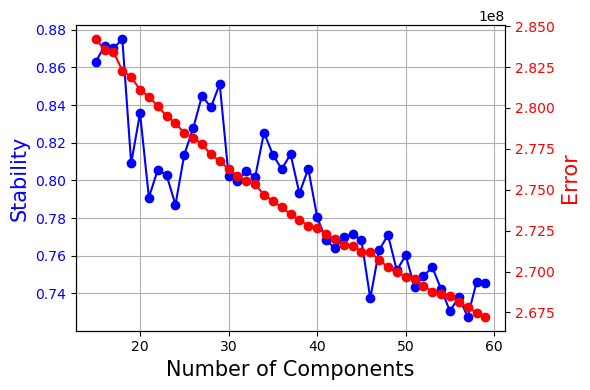

In [58]:
%%time
cnmf_obj.k_selection_plot()

In [59]:
kthresh = {29:0.2, 34:0.2, 37:.2, 39:.2, 48:.2, 53:.2}


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


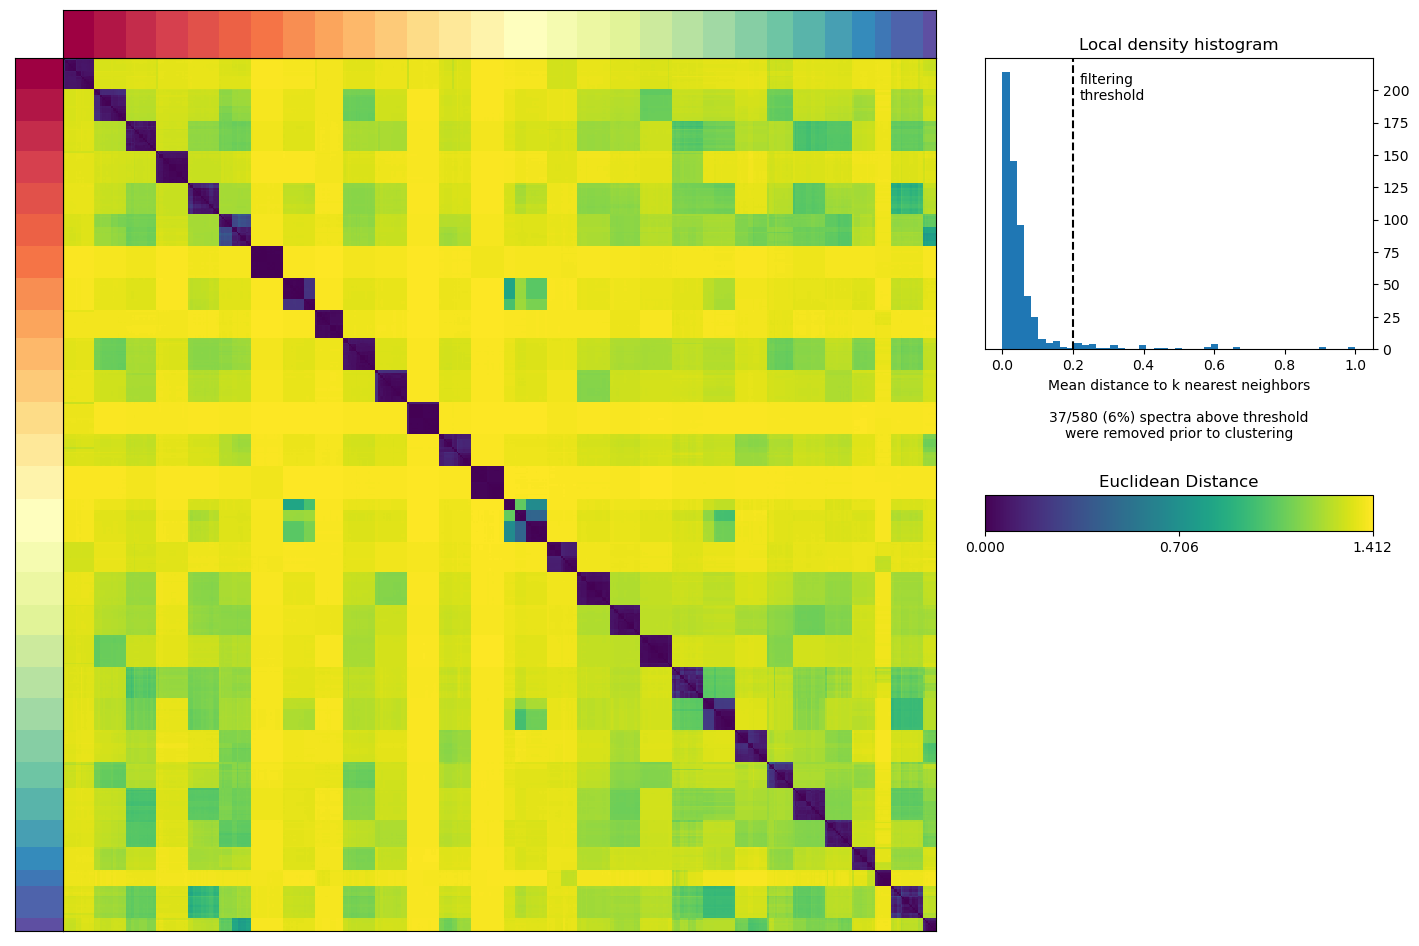

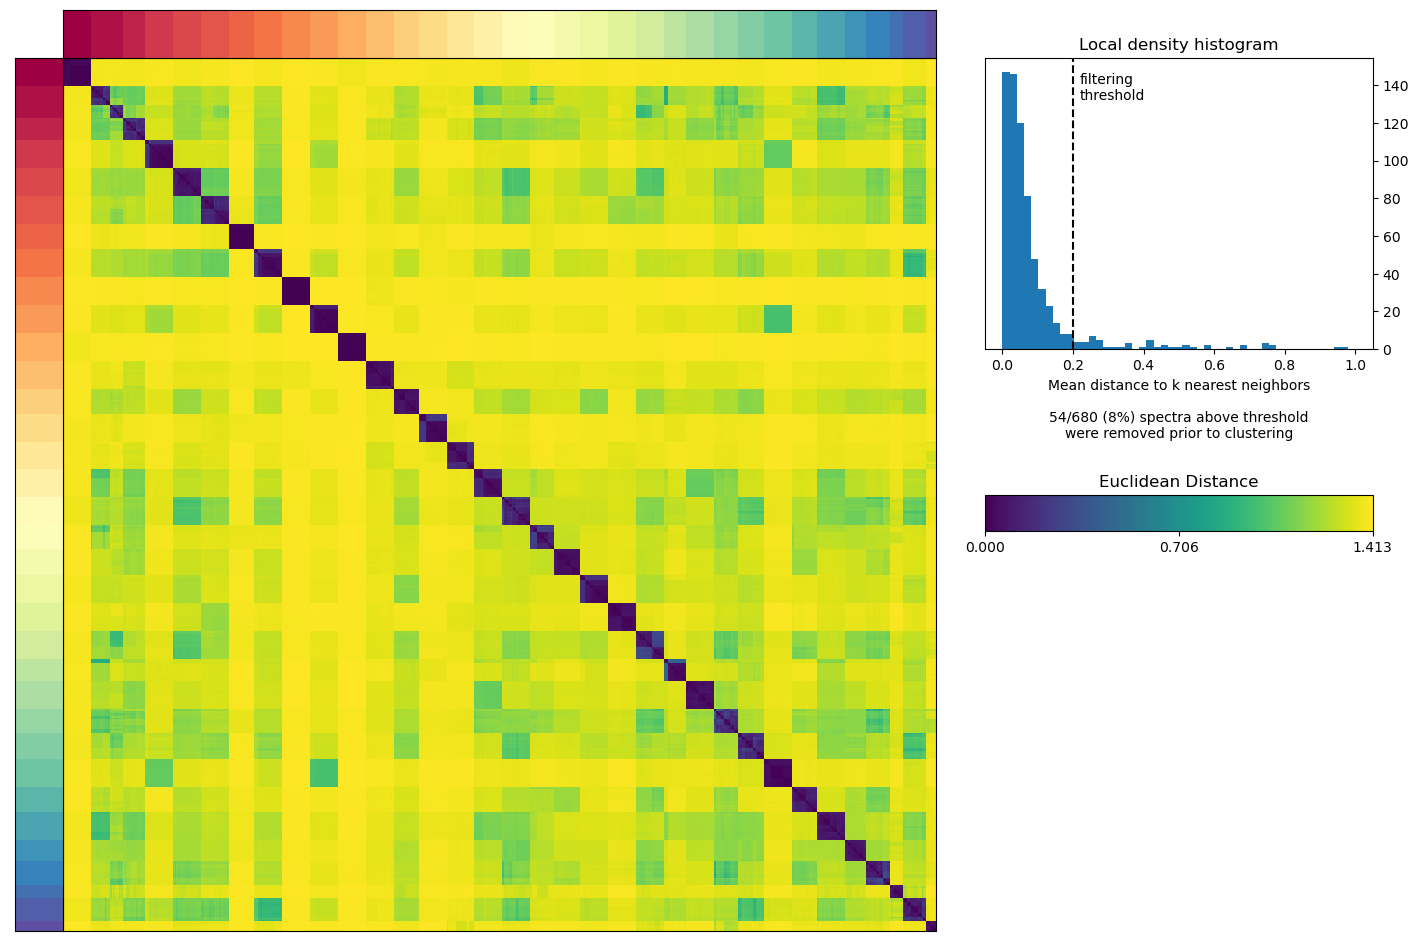

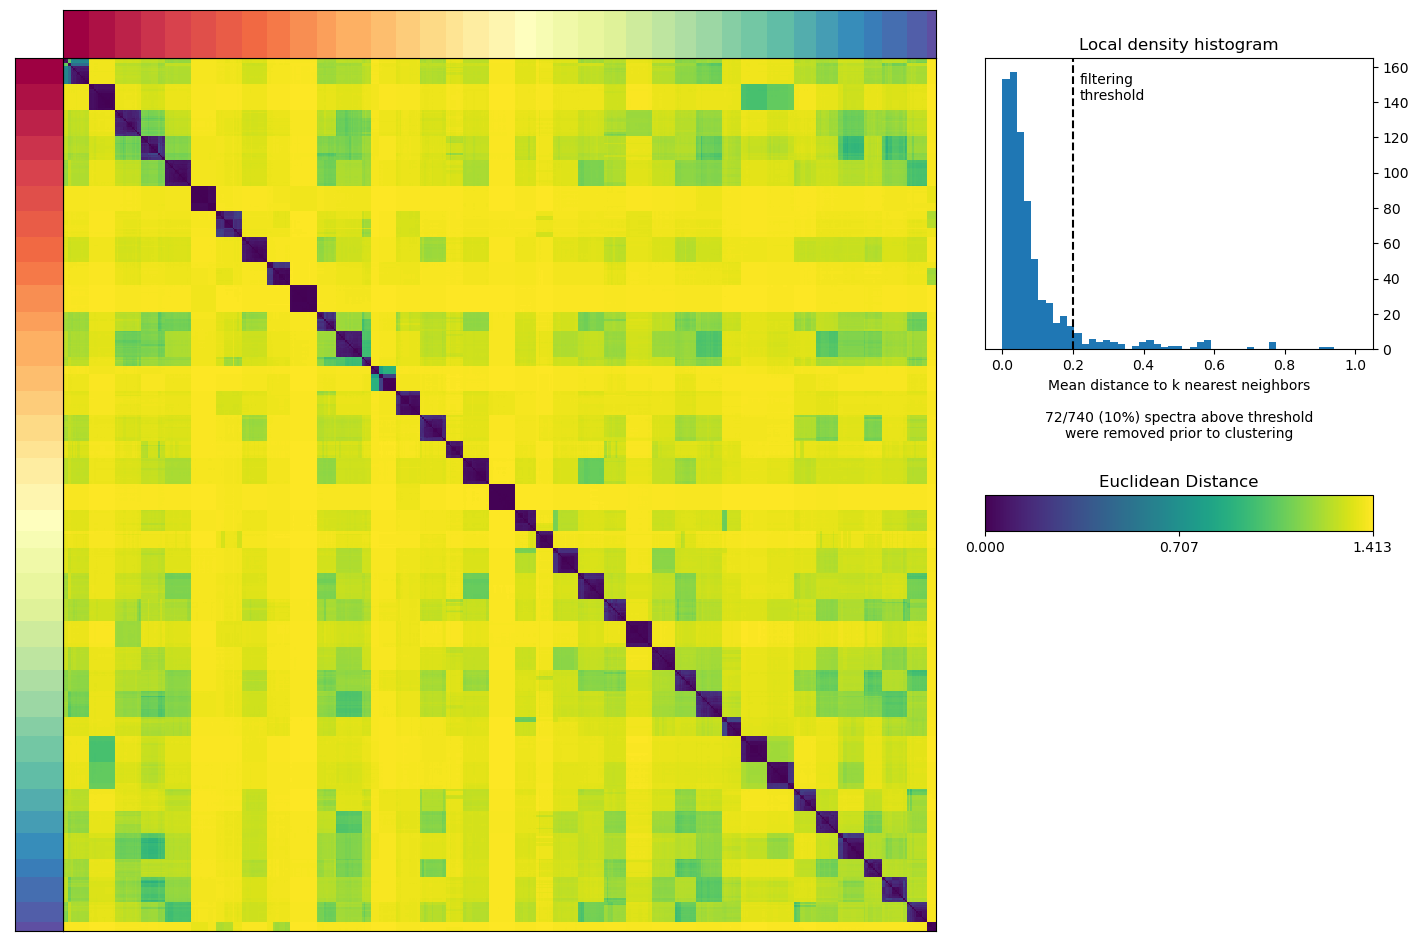

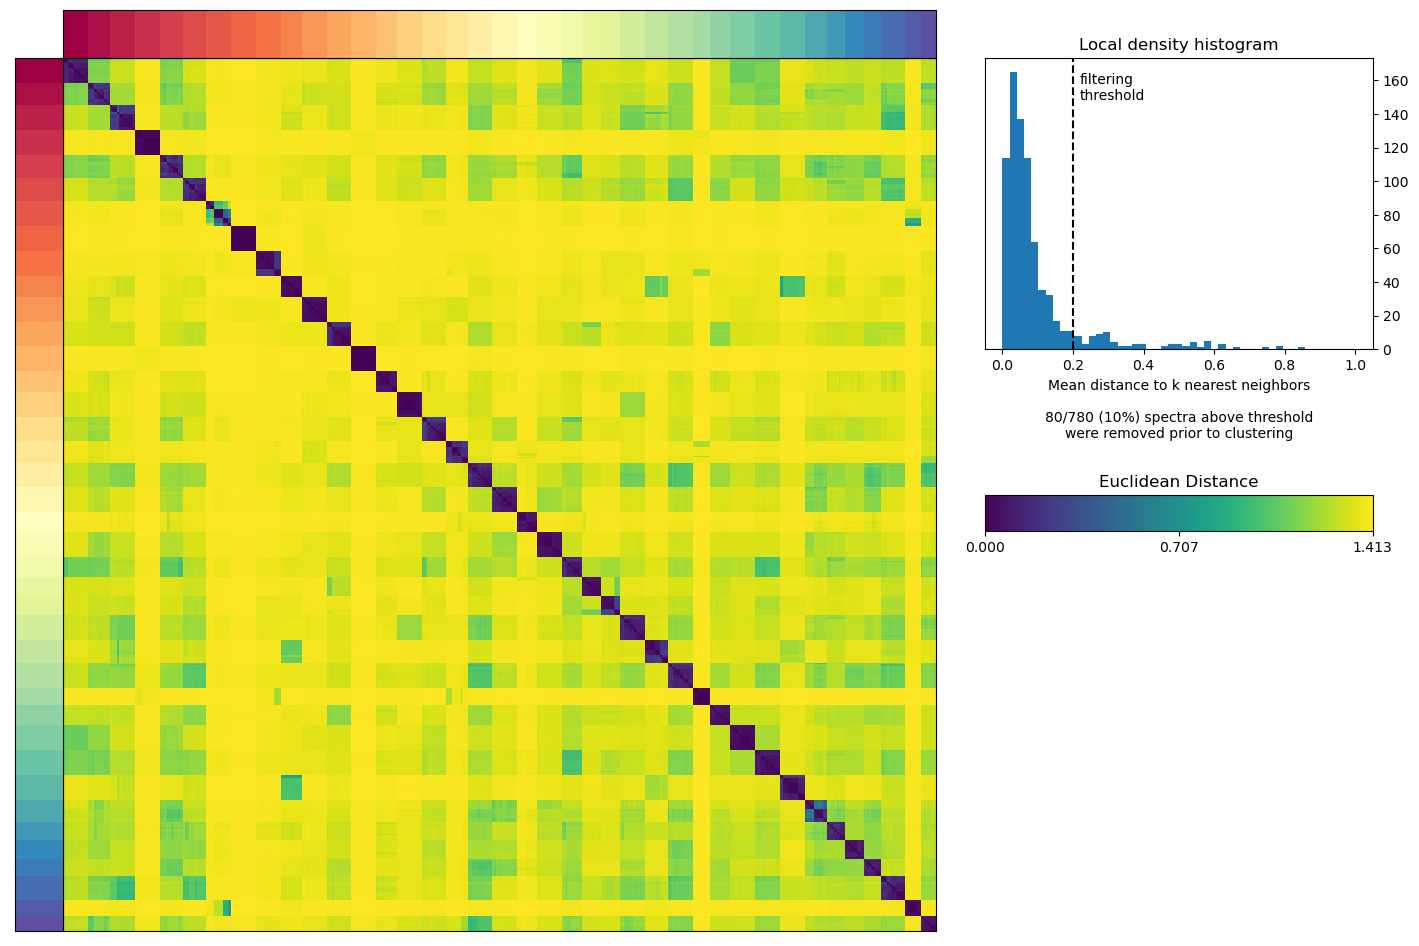

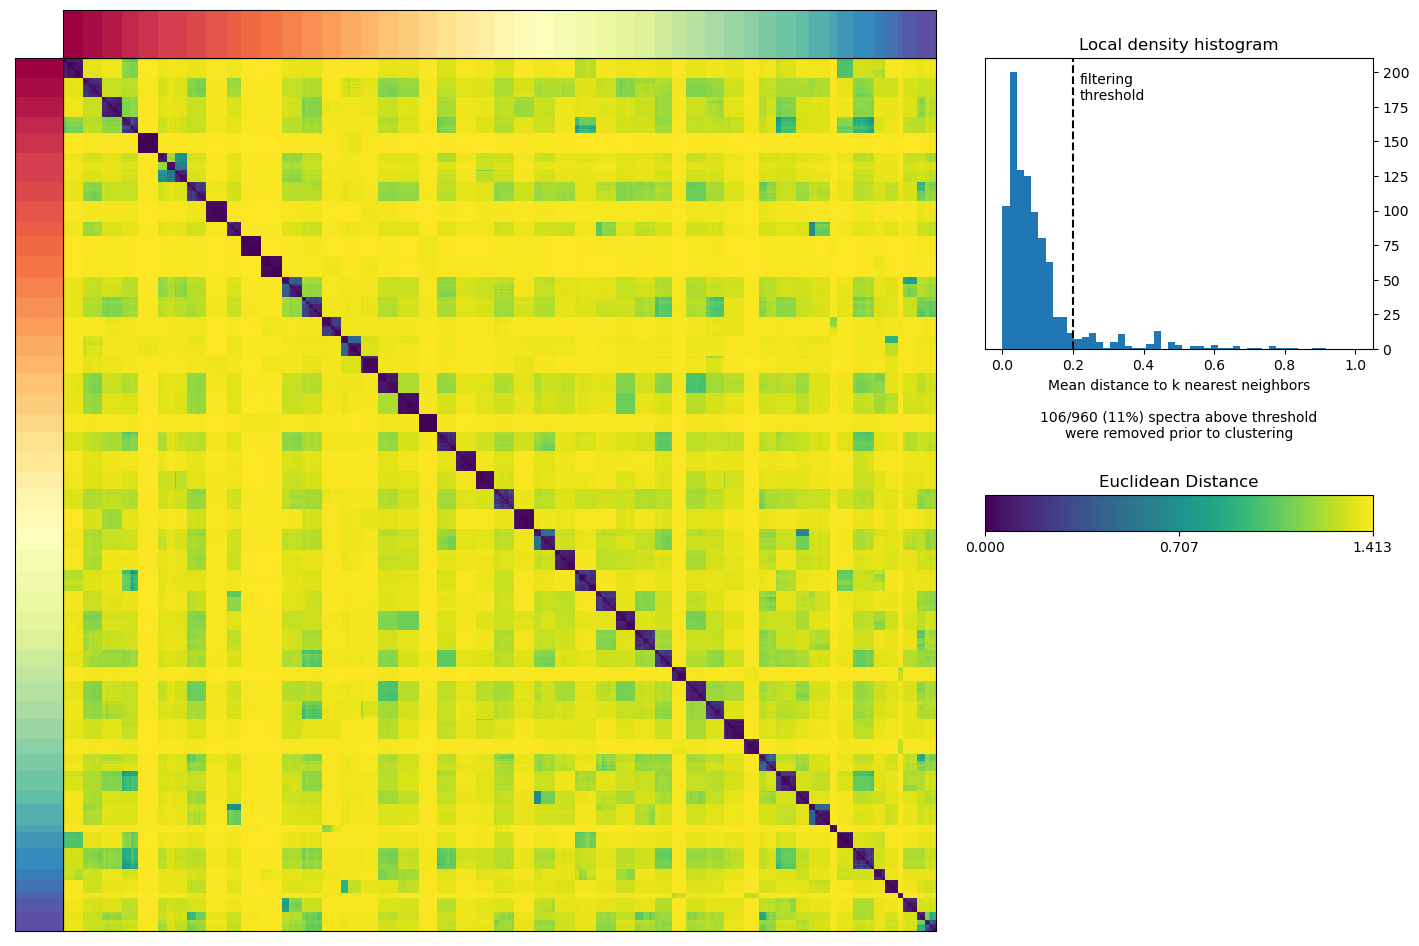

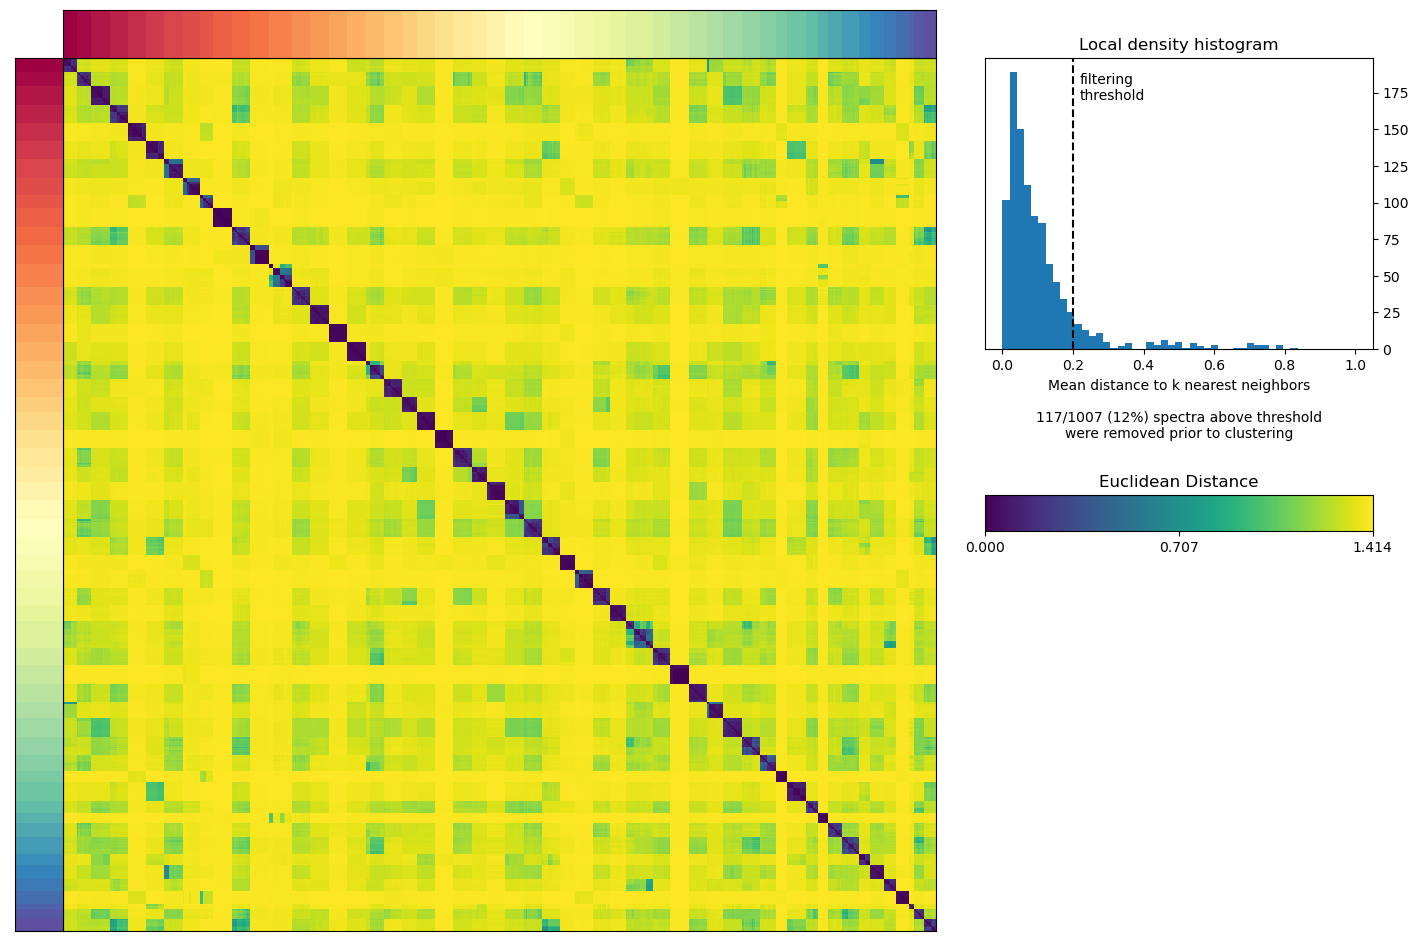

In [60]:
for k in [29, 34, 37, 39, 48, 53]:
    cnmf_obj.consensus(k=k, density_threshold=kthresh[k])

## Compare with original TCATs

In [61]:
metagepinfo = read_dataset_log(tabname='Current Meta-program Paths').loc[0,:]
metagepinfo

clustering_fn                      /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn      /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                        /data/srlab1/TCAT/Data/TCAT/MergedHVG.UnionAll...
tpm_norm_spectra                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_norm_spectra_withsingletons    /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                     /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
Name: 0, dtype: object

In [62]:
clustering = pd.read_csv(metagepinfo.loc['clustering_with_singletons_fn'], sep='\t', index_col=0)
clustering.head()

AMP-RA  \
CellCycle-G2M_CellCycle_G2M                  AMP-RA:CellCycle-G2M   
ISG                                                    AMP-RA:ISG   
gdT                                                           NaN   
Metallothionein                            AMP-RA:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  AMP-RA:CellCycle-Sphase   

                                                          UK-Covid  \
CellCycle-G2M_CellCycle_G2M                 UK-Covid:CellCycle_G2M   
ISG                                                   UK-Covid:ISG   
gdT                                                   UK-Covid:gdT   
Metallothionein                           UK-Covid:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B      UK-Covid:CellCycle_S   

                                                           Pan-Tissue  \
CellCycle-G2M_CellCycle_G2M                  Pan-Tissue:CellCycle-G2M   
ISG                                                    Pan-Tissue:ISG   
gdT                                                               NaN   
Metallothionein                            Pan-Tissue:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  Pan-Tissue:CellCycle-Sphase   

                                                        HIV-Vaccine  \
CellCycle-G2M_CellCycle_G2M               HIV-Vaccine:CellCycle_G2M   
ISG                                                 HIV-Vaccine:ISG   
gdT                                                 HIV-Vaccine:gdT   
Metallothionein                                                 NaN   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B    HIV-Vaccine:CellCycle_S   

                                                          COMBAT  \
CellCycle-G2M_CellCycle_G2M                 COMBAT:CellCycle_G2M   
ISG                                                   COMBAT:ISG   
gdT                                                   COMBAT:gdT   
Metallothionein                           COMBAT:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B      COMBAT:CellCycle_S   

                                                        TBRU  \
CellCycle-G2M_CellCycle_G2M               TBRU:CellCycle_G2M   
ISG                                                 TBRU:ISG   
gdT                                                 TBRU:gdT   
Metallothionein                                          NaN   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B    TBRU:DTL/FAM111B   

                                                           Pan-Cancer  
CellCycle-G2M_CellCycle_G2M                  Pan-Cancer:CellCycle-G2M  
ISG                                                    Pan-Cancer:ISG  
gdT                                                               NaN  
Metallothionein                            Pan-Cancer:Metallothionein  
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  Pan-Cancer:CellCycle-Sphase

In [63]:
tcat_spectra_all = pd.read_csv(metagepinfo.loc['scores_spectra'], sep='\t', index_col=0).T

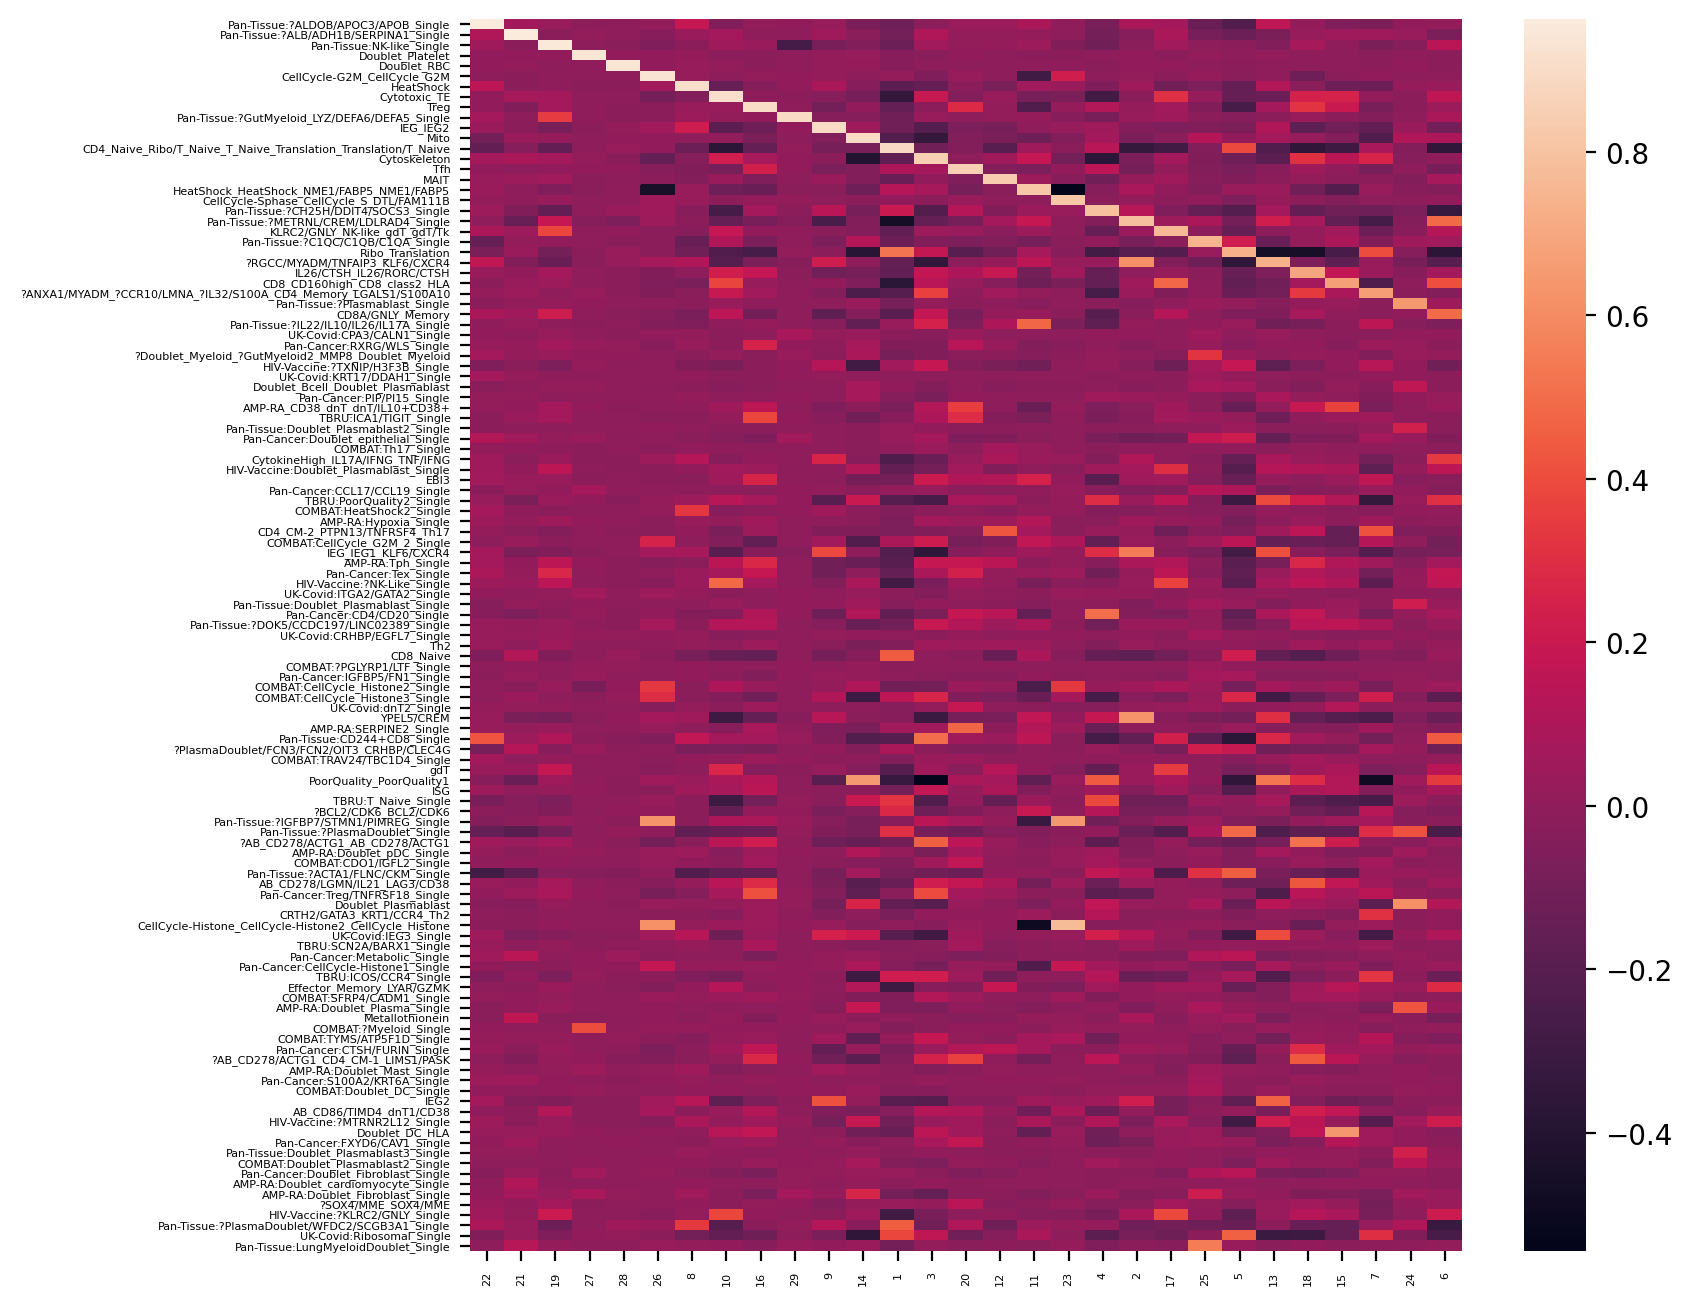

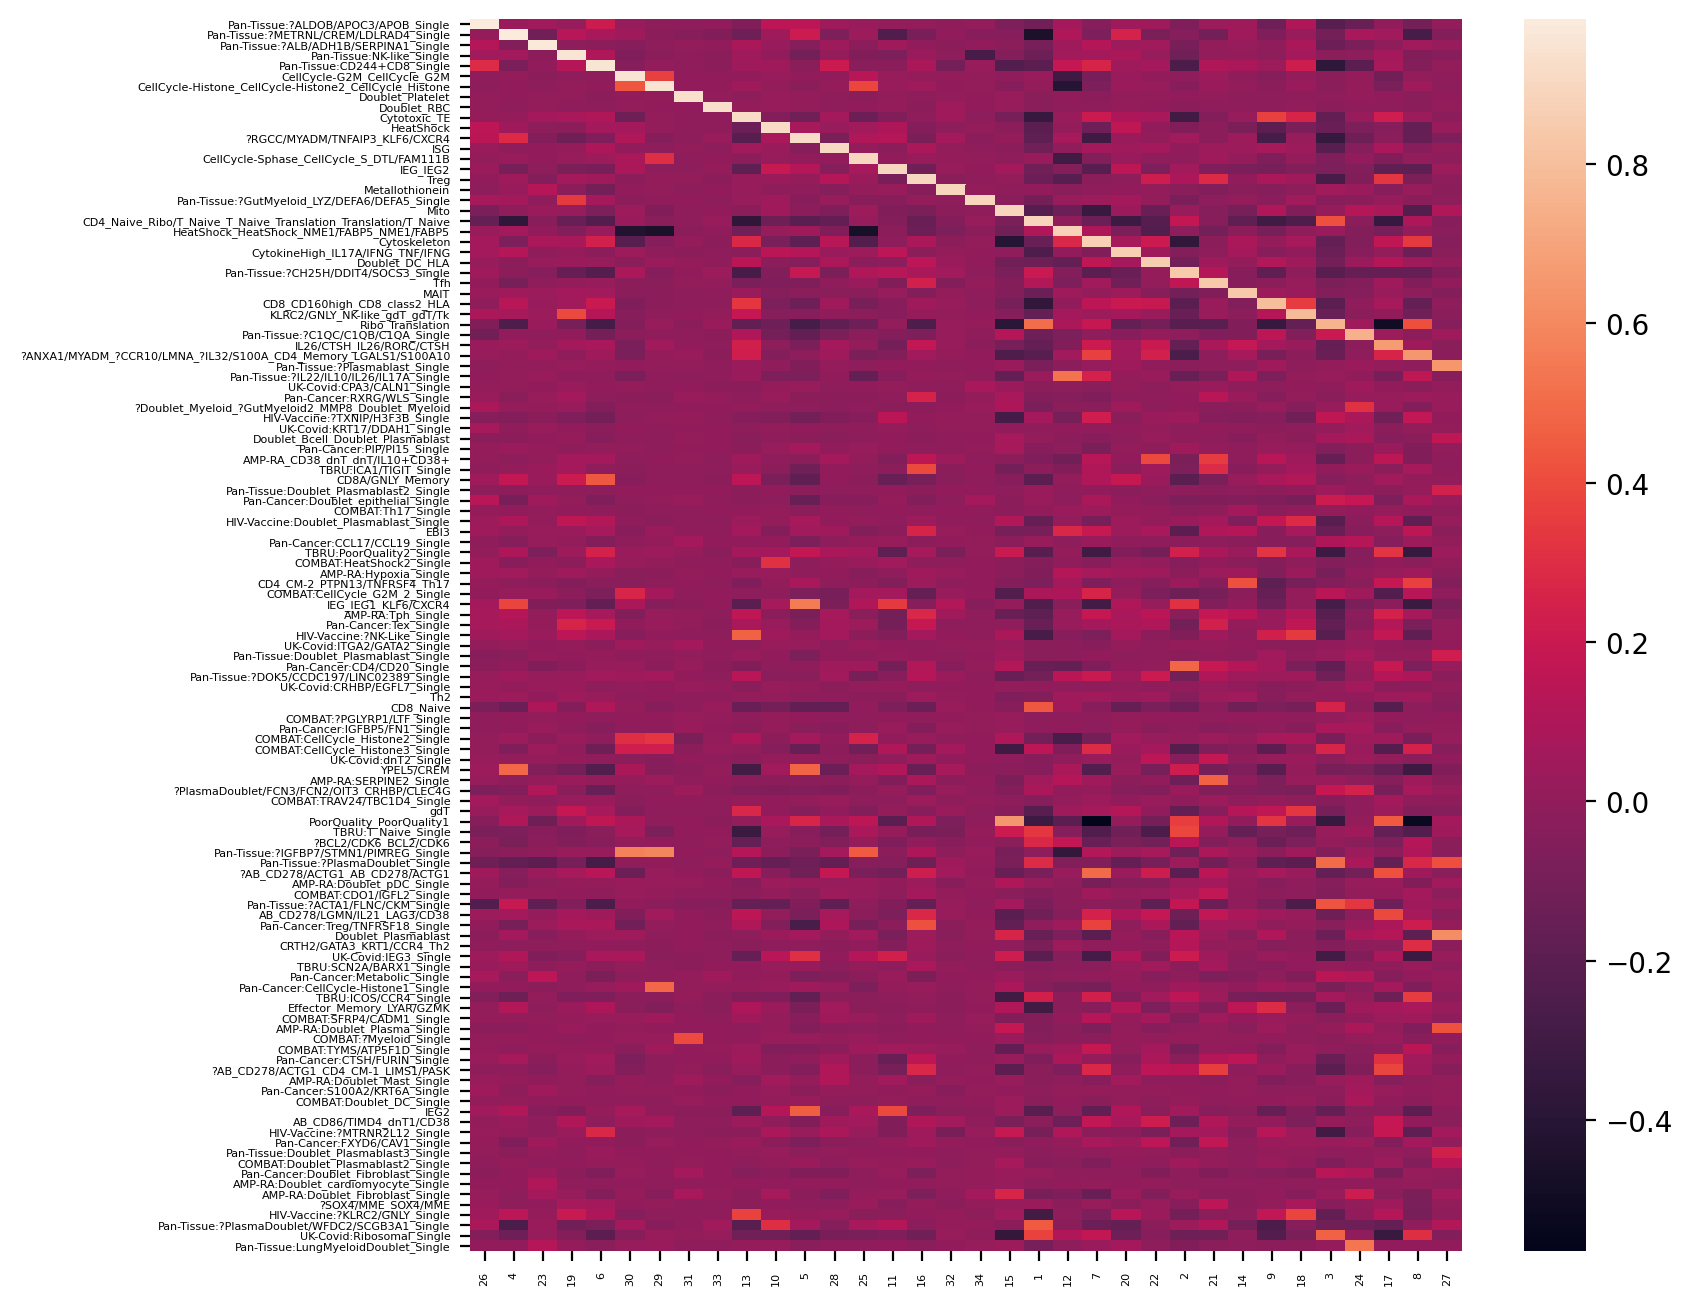

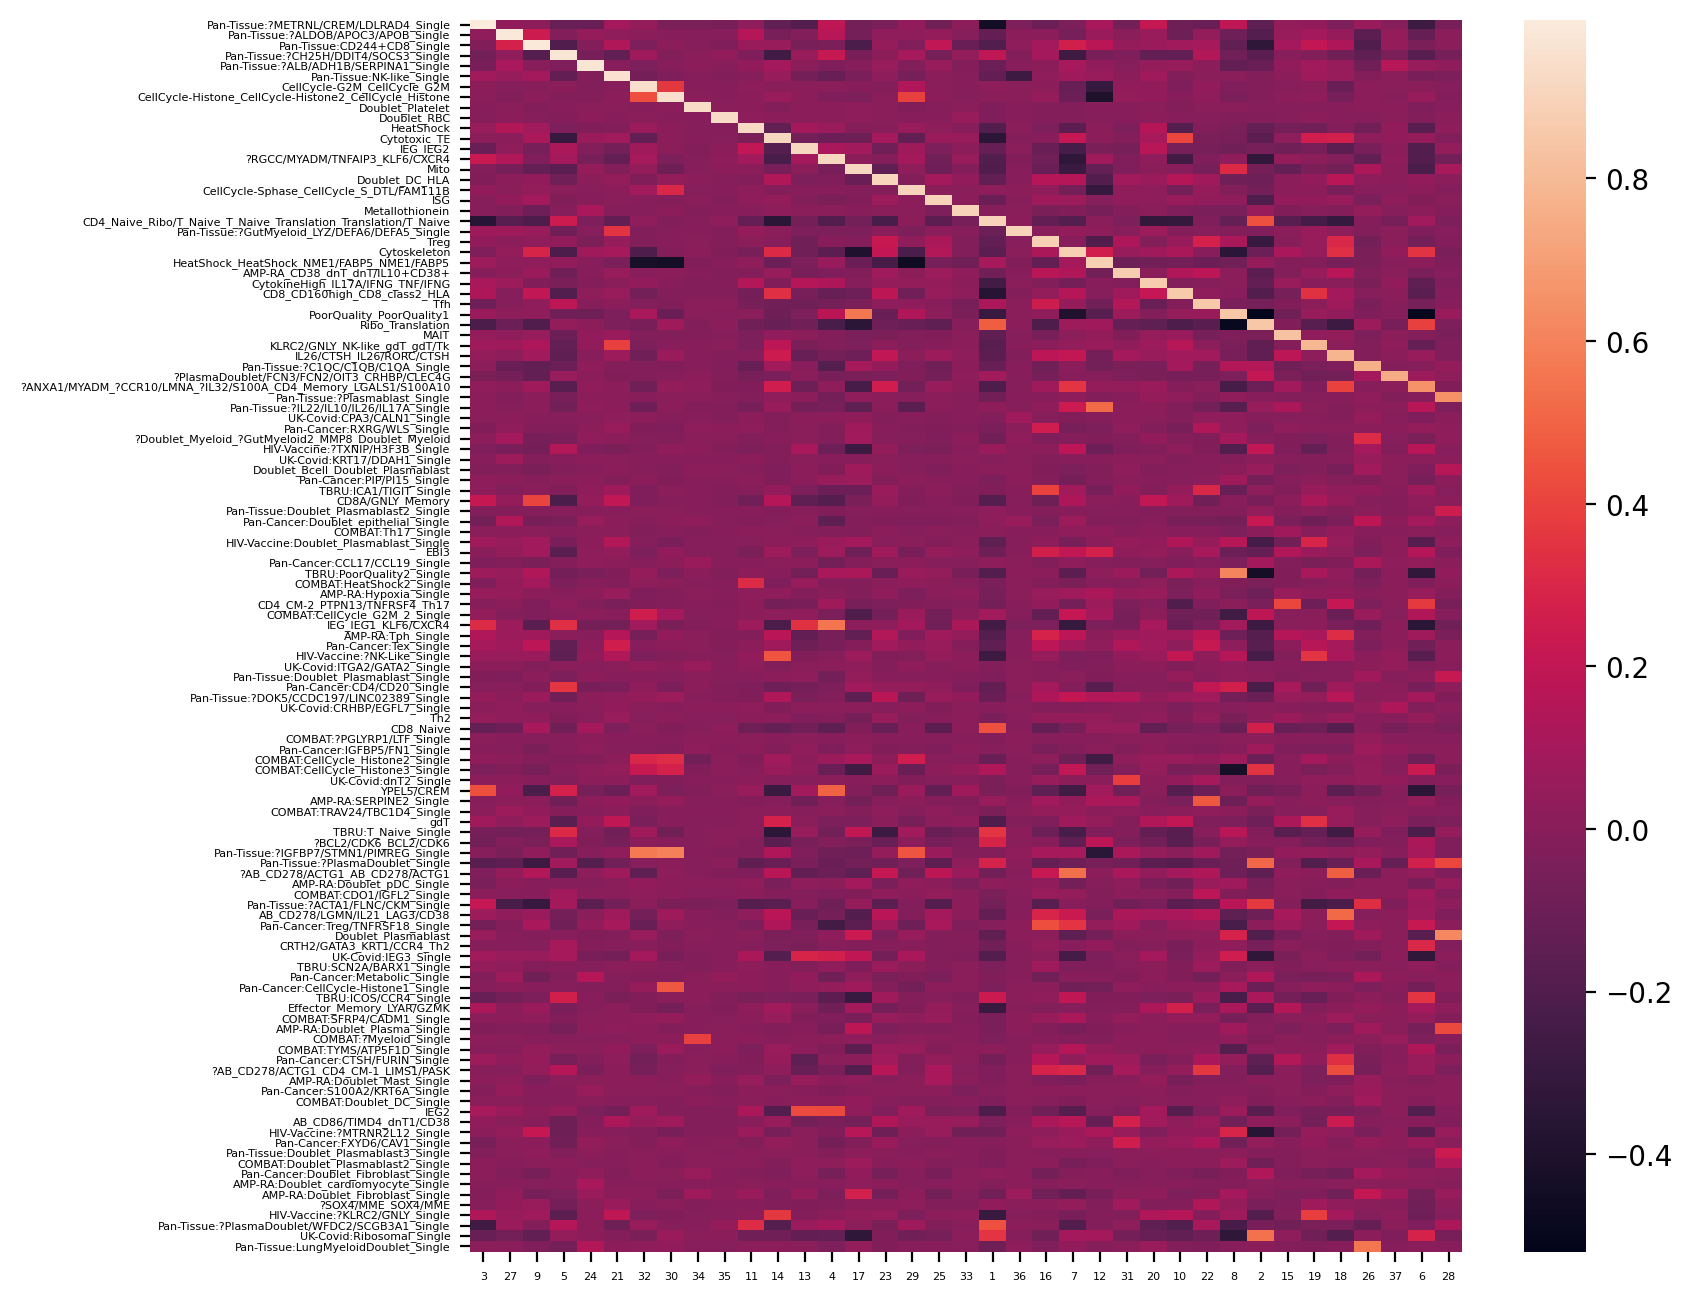

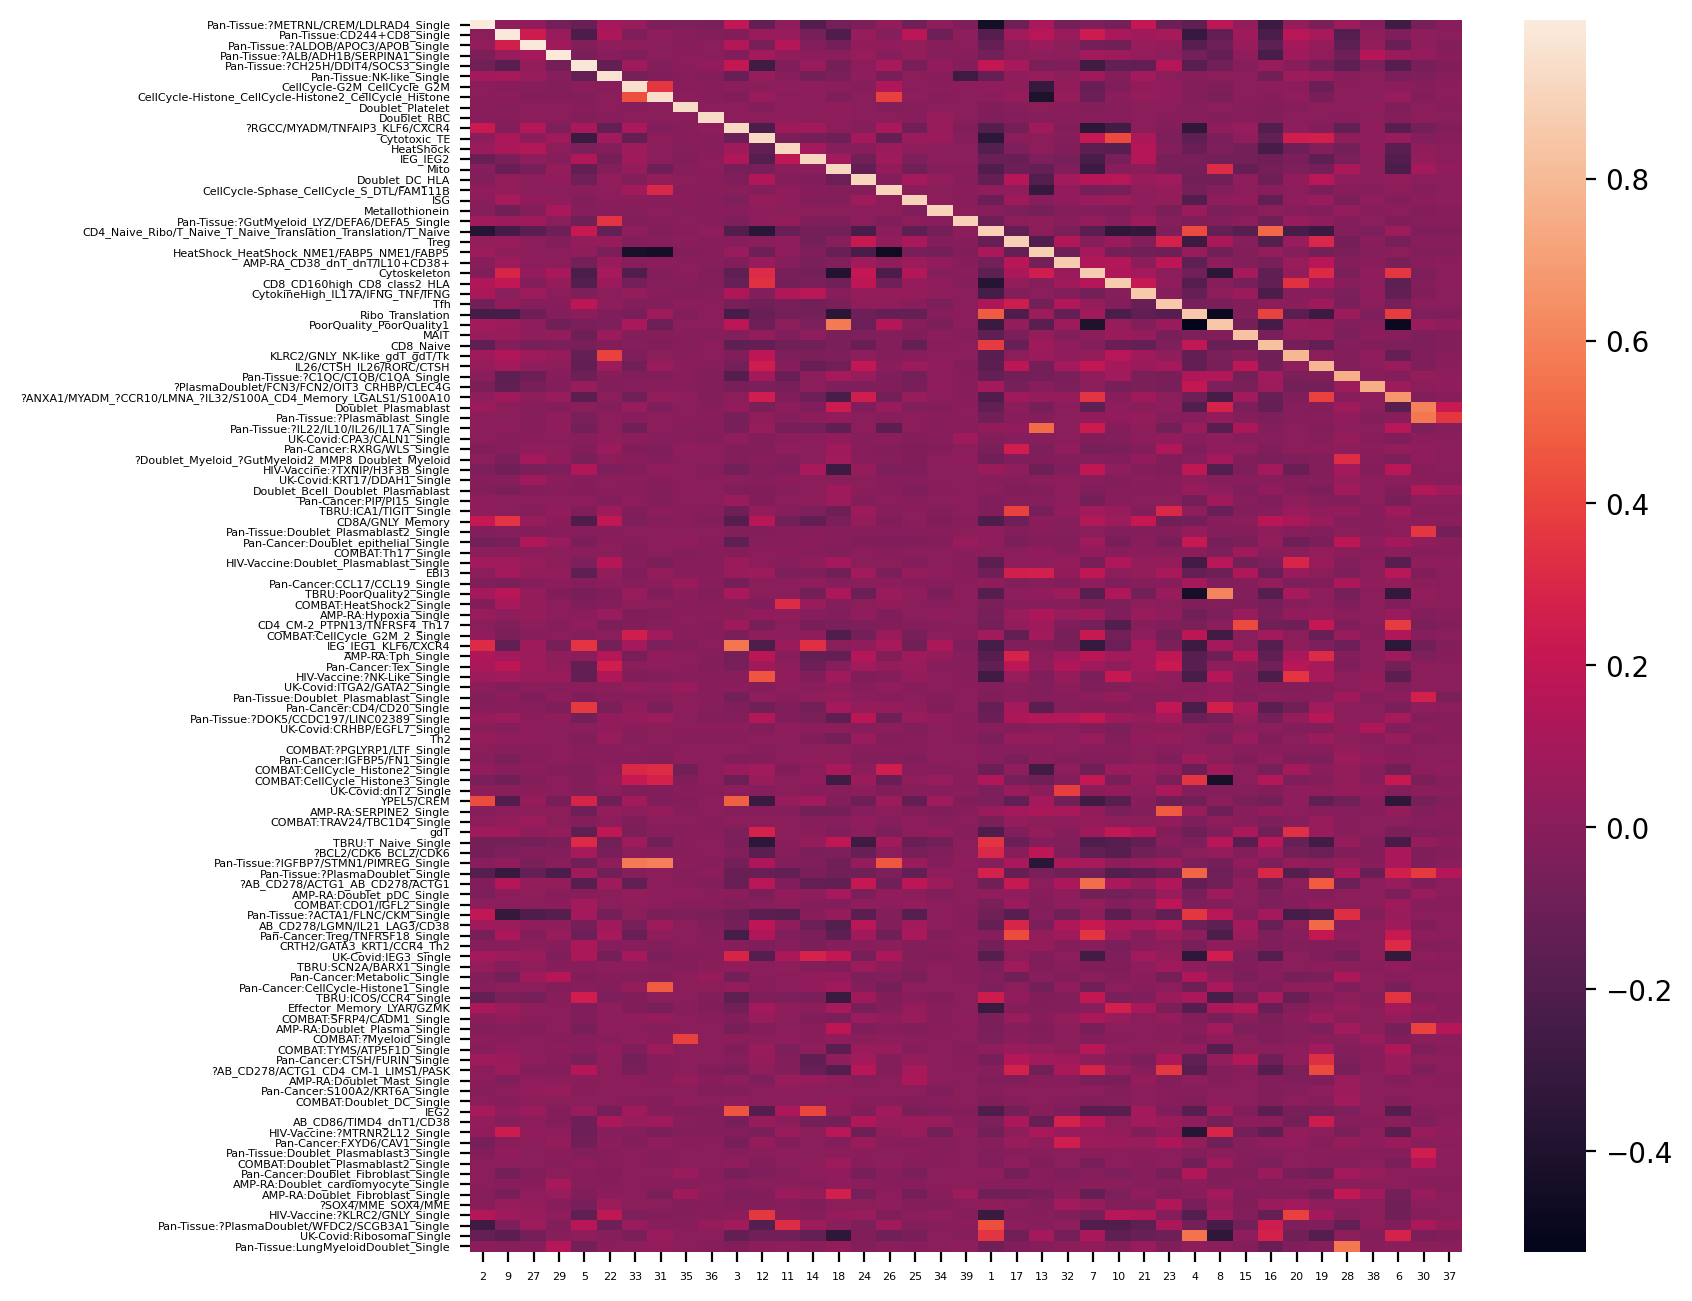

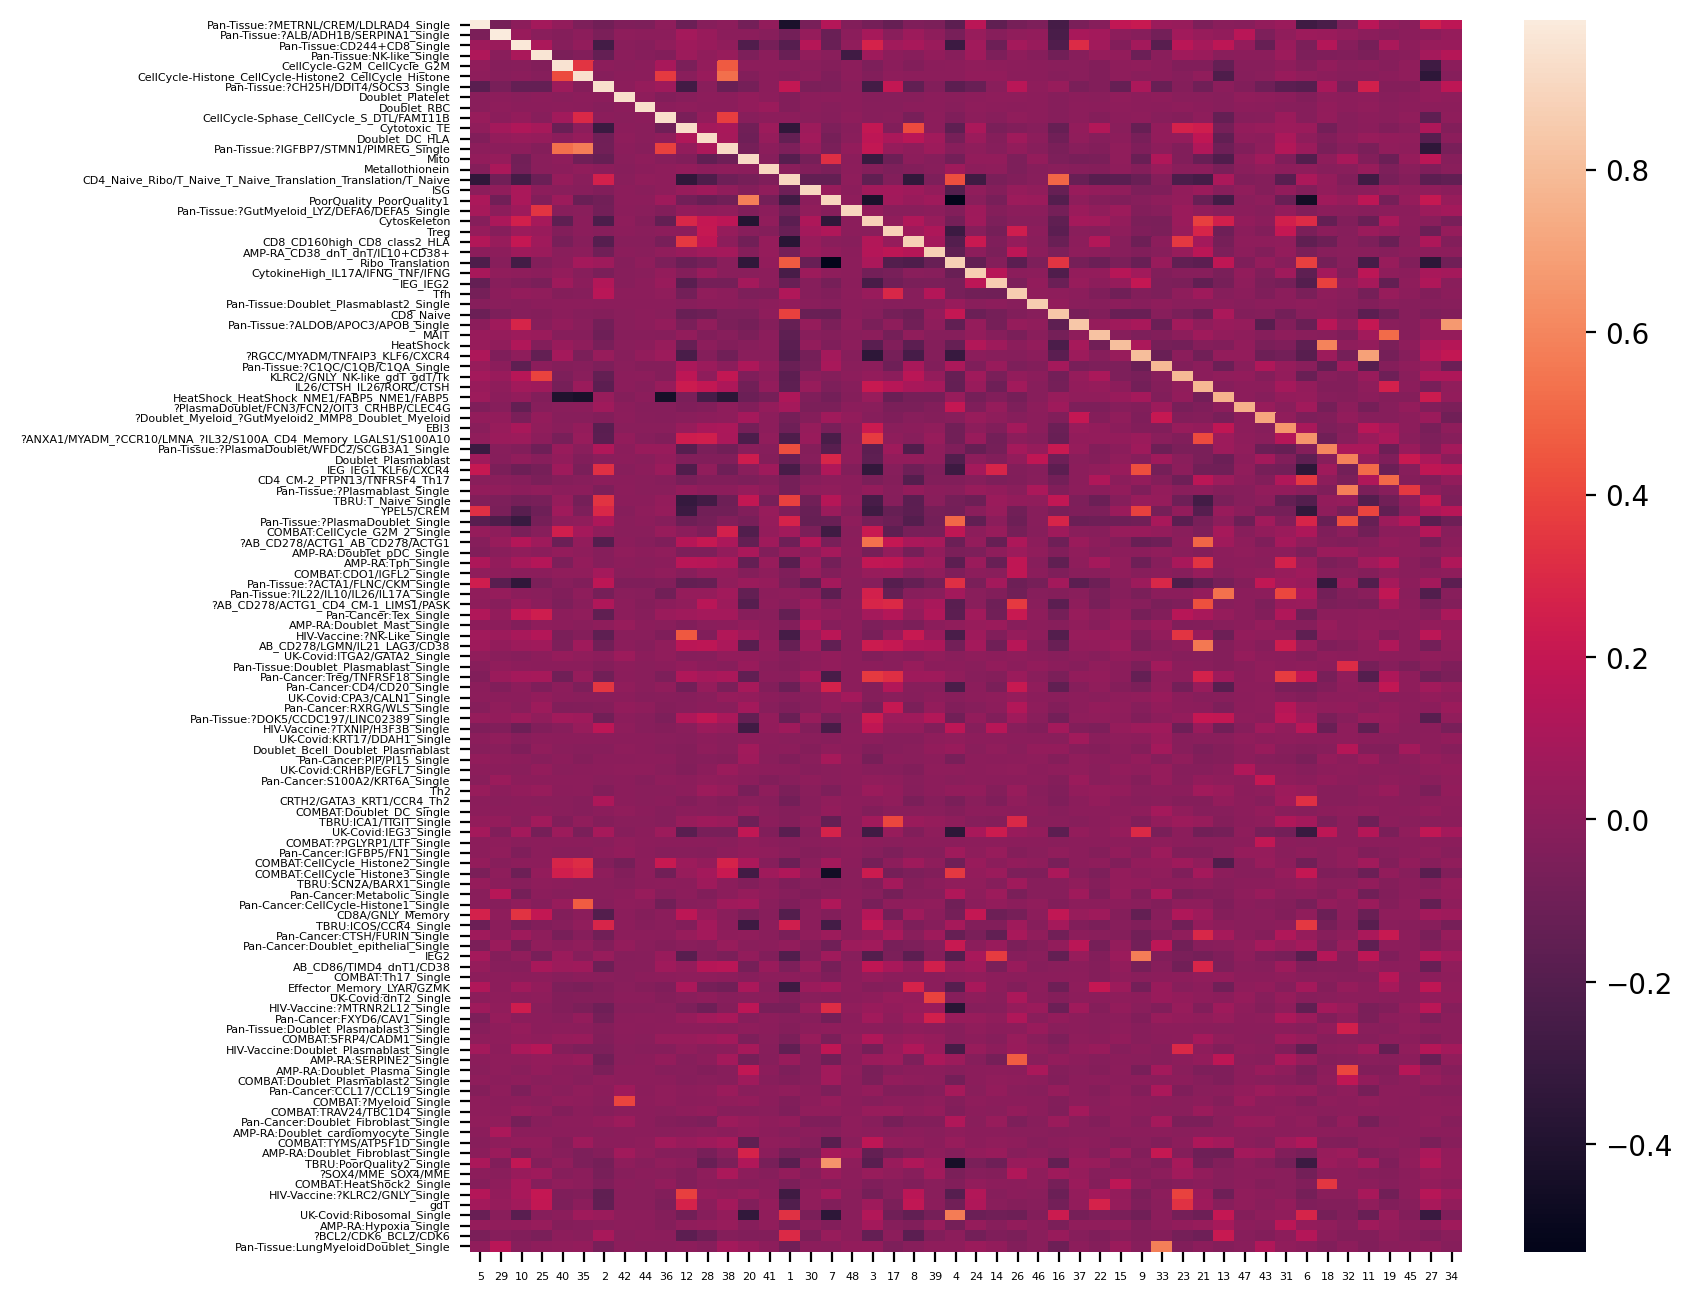

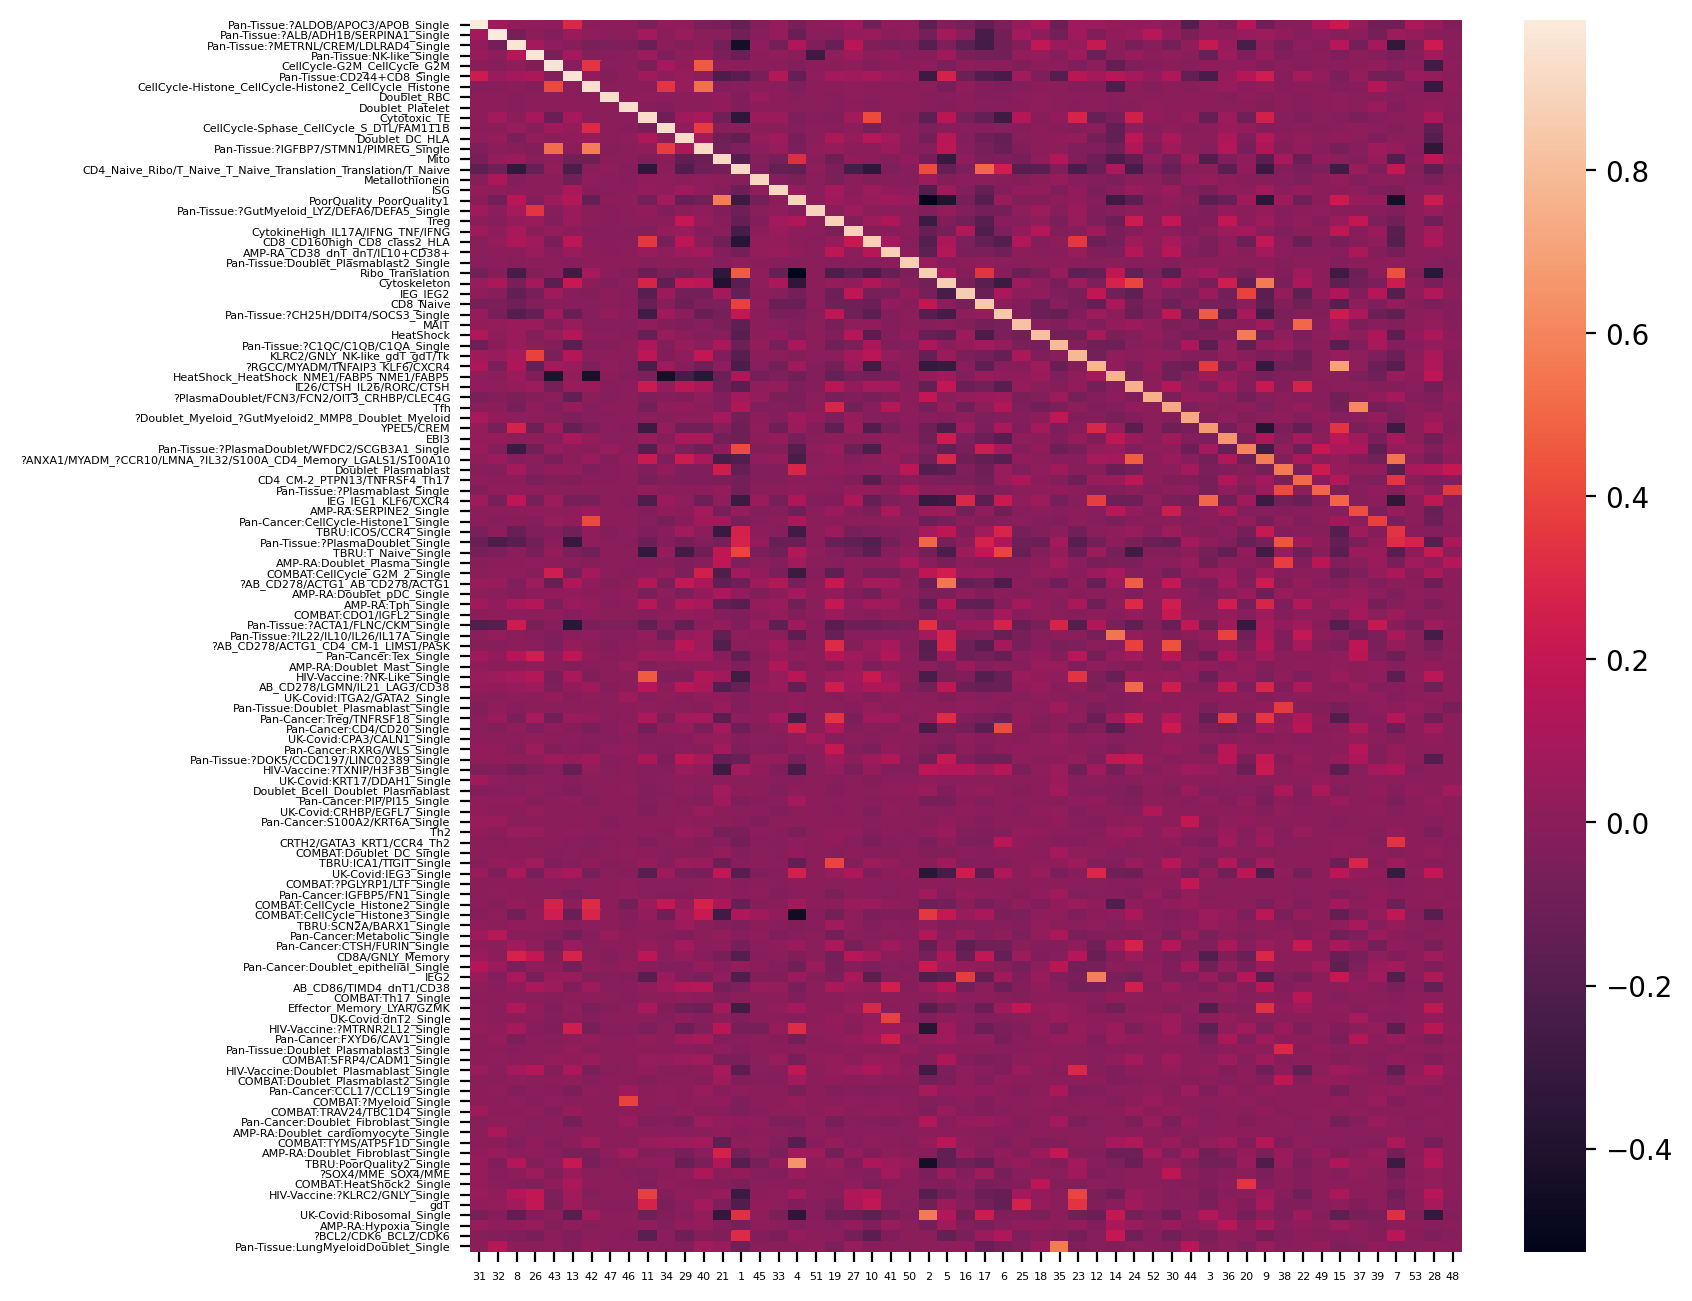

In [64]:
res = []
R_thresh = 0.55
dataset_cols = ['AMP-RA', 'UK-Covid', 'HIV-Vaccine', 'HIV-Vaccine', 'COMBAT', 'TBRU', 'Pan-Cancer']
this_datset = 'Pan-Tissue'
other_dataset_cols = list(set(dataset_cols) - set([this_datset]))
mapping_ref = {}
top_genes_relabeled = {}

for k in [29, 34, 37, 39, 48, 53]:
    (usage, spectra_scores, spectra_tpm, top_genes) = cnmf_obj.load_results(K=k, density_threshold=kthresh[k])
    overlap_genes = list(set(spectra_scores.index).intersection(tcat_spectra_all.index))
    mapping, unmatched, R = match_columns(tcat_spectra_all.loc[overlap_genes, :], spectra_scores.loc[overlap_genes, :])
    R_for_plot = R.loc[list(mapping['X_columns']) + unmatched, mapping['Y_columns']]
    rename_dict = dict(zip(mapping['Y_columns'], mapping['X_columns']))
    top_genes = top_genes.rename(columns=rename_dict).loc[:, mapping['X_columns']]
    top_genes_relabeled[k] = top_genes

    fig,ax = plt.subplots(1,1, figsize=(8,8), dpi=200)
    sns.heatmap(R_for_plot, ax=ax)
    ax.set_xticks(np.arange(R_for_plot.shape[1])+0.5)
    ax.set_yticks(np.arange(R_for_plot.shape[0])+0.5)
    ax.set_xticklabels(R_for_plot.columns, fontsize=4)
    ax.set_yticklabels(R_for_plot.index, fontsize=4)

    merge_annotation = pd.merge(left=mapping, right=clustering, left_on='X_columns', right_index=True, how='outer')
    mapping_ref[k] = merge_annotation
    total_overlaps = (merge_annotation['R']>R_thresh).sum()
    ind = (merge_annotation['R']>R_thresh) & ((~merge_annotation[dataset_cols].isnull()).sum(axis=1)>1)
    nonsingleton_overlaps = ind.sum()
    this_dataset_singletons_ind = (~merge_annotation[other_dataset_cols].isnull()).sum(axis=1)==0
    recur_singleton_ind = this_dataset_singletons_ind & (merge_annotation['R']>R_thresh)
    new_singleton_match_ind = ((~merge_annotation[other_dataset_cols].isnull()).sum(axis=1)==1) & (merge_annotation['R']>R_thresh) & merge_annotation[this_datset].isnull()
    res.append([k, total_overlaps, nonsingleton_overlaps, this_dataset_singletons_ind.sum(), recur_singleton_ind.sum(), (merge_annotation['R']<R_thresh).sum(), new_singleton_match_ind.sum()])

    
    
res = pd.DataFrame(res, columns=['K', 'Num_GEP_Overlaps', 'Num_TCAT_NonSingletonOverlaps', 'Orig_TCAT_Dataset_Singletons', 'TCAT_Singletons_Found', 'New_Singletons', 'Orig_TCAT_OtherDataset_Singleton_Match'])


In [65]:
res

K  Num_GEP_Overlaps  Num_TCAT_NonSingletonOverlaps  \
0  29                28                             18   
1  34                34                             23   
2  37                37                             25   
3  39                38                             27   
4  48                43                             29   
5  53                44                             30   

   Orig_TCAT_Dataset_Singletons  TCAT_Singletons_Found  New_Singletons  \
0                            19                      8               1   
1                            19                      9               0   
2                            19                      9               0   
3                            19                      8               1   
4                            19                     11               5   
5                            19                     11               9   

   Orig_TCAT_OtherDataset_Singleton_Match  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
5                                       0

In [66]:
set1=48
set2=39
set(mapping_ref[set1].loc[mapping_ref[set1]['R']>R_thresh, 'X_columns']) - set(mapping_ref[set2].loc[mapping_ref[set2]['R']>R_thresh, 'X_columns'])

{'?Doublet_Myeloid_?GutMyeloid2_MMP8_Doublet_Myeloid',
 'EBI3',
 'Pan-Tissue:?IGFBP7/STMN1/PIMREG_Single',
 'Pan-Tissue:?PlasmaDoublet/WFDC2/SCGB3A1_Single',
 'Pan-Tissue:Doublet_Plasmablast2_Single'}

In [67]:
set1=53
set2=39
set(mapping_ref[set1].loc[mapping_ref[set1]['R']>R_thresh, 'X_columns']) - set(mapping_ref[set2].loc[mapping_ref[set2]['R']>R_thresh, 'X_columns'])

{'?Doublet_Myeloid_?GutMyeloid2_MMP8_Doublet_Myeloid',
 'EBI3',
 'Pan-Tissue:?IGFBP7/STMN1/PIMREG_Single',
 'Pan-Tissue:?PlasmaDoublet/WFDC2/SCGB3A1_Single',
 'Pan-Tissue:Doublet_Plasmablast2_Single',
 'YPEL5/CREM'}

## Compare with the version without blood samples

In [70]:
without_blood_spec = pd.read_csv('/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200.Spectra_Scores.Relabeled.tsv', index_col=0, sep='\t')
without_blood_spec.head()

CD4-Naive  METRNL/CREM  RGCC/MYADM  S100A10/LMNA  CH25H/DDIT4  \
LINC01409  -0.000054     0.000146   -0.000244     -0.000356    -0.000135   
FAM87B     -0.000013    -0.000015    0.000011     -0.000029    -0.000014   
LINC01128   0.000372     0.000306    0.000339     -0.000048    -0.000122   
LINC00115  -0.000048    -0.000074   -0.000063     -0.000044    -0.000065   
FAM41C     -0.000197     0.000495    0.000131     -0.000087     0.000102   

           Translation    MALAT1  Cytoskeleton  CD244/CD8  HeatShock1  ...  \
LINC01409    -0.000573  0.001464     -0.000167  -0.000049   -0.000220  ...   
FAM87B       -0.000090  0.000067      0.000028  -0.000046   -0.000014  ...   
LINC01128    -0.000631  0.000158     -0.000204  -0.000222   -0.000049  ...   
LINC00115    -0.000439  0.000241     -0.000090   0.000071   -0.000041  ...   
FAM41C        0.000428  0.000004     -0.000019  -0.000017   -0.000268  ...   

           CellCycle-Histone  Pan-Tissue:Liver-Metabolism  IL10/CD38  \
LINC01409          -0.000036                    -0.000361  -0.000028   
FAM87B              0.000006                    -0.000148  -0.000007   
LINC01128          -0.000034                    -0.000188   0.000378   
LINC00115          -0.000050                    -0.000034  -0.000193   
FAM41C              0.000007                    -0.000299   0.000010   

           CellCycle-G2M  Metallothionein  Doublet-Platelet  Doublet-RBC  \
LINC01409      -0.000010        -0.000024         -0.000176    -0.000187   
FAM87B         -0.000001        -0.000046         -0.000083    -0.000090   
LINC01128       0.000048        -0.000347          0.000030    -0.000041   
LINC00115       0.000062         0.000032         -0.000049    -0.000182   
FAM41C         -0.000017        -0.000019         -0.000171     0.000457   

           Pan-Tissue:Plasma  Pan-Tissue:Paneth  FCN3/FCN2  
LINC01409          -0.000062           0.000050  -0.000185  
FAM87B             -0.000027          -0.000020  -0.000093  
LINC01128          -0.000236          -0.000244   0.000098  
LINC00115           0.000597          -0.000125   0.000097  
FAM41C             -0.000154          -0.000250   0.000030  

[5 rows x 39 columns]

In [75]:
k = 39
(usage, spectra_scores, spectra_tpm, top_genes) = cnmf_obj.load_results(K=k, density_threshold=kthresh[k])
overlap_genes = list(set(spectra_scores.index).intersection(without_blood_spec.index))
mapping, unmatched, R = match_columns(without_blood_spec.loc[overlap_genes, :], spectra_scores.loc[overlap_genes, :])

In [78]:
spectra_scores.shape, without_blood_spec.shape

((18672, 39), (18553, 39))

In [76]:
mapping

Y_columns                    X_columns         R
1519         39            Pan-Tissue:Paneth  0.999795
839          22                    NK-Like-3  0.999052
1280         33                CellCycle-G2M  0.998678
399          11                   HeatShock1  0.998614
1400         36                  Doublet-RBC  0.998447
759          20                          gdT  0.998354
1038         27   Pan-Tissue:Digestive/Liver  0.998325
1440         37            Pan-Tissue:Plasma  0.998325
1481         38                    FCN3/FCN2  0.998254
640          17                         Treg  0.997958
799          21                High-Cytokine  0.997810
440          12                    Cytotoxic  0.997695
880          23                          Tfh  0.997645
1199         31            CellCycle-Histone  0.997446
320           9                    CD244/CD8  0.997445
1002         26                  CellCycle-S  0.997270
961          25                          ISG  0.996913
560          15                         MAIT  0.996780
1240         32                    IL10/CD38  0.996747
40            2                  METRNL/CREM  0.996675
361          10                       CD8_EM  0.996642
1159         30               Doublet-Plasma  0.996286
1122         29  Pan-Tissue:Liver-Metabolism  0.995711
520          14                   IEG-Tissue  0.995647
279           8                       MALAT1  0.995043
920          24                          HLA  0.995007
480          13                   HeatShock2  0.993203
680          18                         Mito  0.991924
198           6                 S100A10/LMNA  0.991771
80            3                   RGCC/MYADM  0.989631
1079         28        Pan-Tissue:Macrophage  0.989229
1320         34              Metallothionein  0.988610
0             1                    CD4-Naive  0.987980
241           7                 Cytoskeleton  0.986380
723          19                    IL26/CTSH  0.985693
160           5                  CH25H/DDIT4  0.978066
1360         35             Doublet-Platelet  0.966142
600          16                    CD8-Naive  0.960000
122           4                  Translation  0.956770

# K=39

In [212]:
paths

{'Original': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.h5ad',
 'RNA_Varnorm_Harmony': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.NoBlood.20230927RNA.VarNorm.HVG.HarmonyGeneCorrect.h5ad',
 'RNA_HVG_List': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.NoBlood.20230927RNA.HVGlist.tsv',
 'Metadata': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.NoBlood.20230927metadata.tsv',
 'TP10K': '../../../Data/PerDataset/XTissueImmuneAtlas/T.counts.NoBlood.20230927RNA.TP10K.h5ad'}

In [309]:
os.path.abspath(paths['RNA_Varnorm_Harmony'])

'/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/T.counts.NoBlood.20230927RNA.VarNorm.HVG.HarmonyGeneCorrect.h5ad'

In [210]:
cnmfdir = '../../../Data/PerDataset/XTissueImmuneAtlas'
name = 'XTissue.20230927.NoBlood.Iter200'

In [213]:
cnmf_count_fn = paths['RNA_Varnorm_Harmony']
cnmf_tpm_fn = paths['TP10K']
hvg_fn = paths['RNA_HVG_List']

jname = name
cnmfout = os.path.join(cnmfdir, name, 'log')

Ks = np.arange(39, 40)
n_iter = 200
num_per_node = 4

In [214]:
total_workers = int((len(Ks)*n_iter) / num_per_node)
total_workers

50

In [215]:
cnmf_obj = cNMF(output_dir=cnmfdir, name=name)

In [216]:
cnmf_obj.prepare(counts_fn=cnmf_count_fn, components=Ks,
                 n_iter=n_iter, tpm_fn=cnmf_tpm_fn, genes_file=hvg_fn, init='random')

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].


In [217]:
if not os.path.exists(cnmfout): os.mkdir(cnmfout)

basecmd = "export OMP_NUM_THREADS=6; cnmf factorize --name {name} --output-dir {outdir} --total-workers {tw} --worker-index {i}"
q = 'short'
other = '-R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]"'

for i in range(total_workers):
    cmd = basecmd.format(name=name, outdir=cnmfdir, i=i, tw=total_workers)
    e = os.path.join(cnmfout, '{j}.{i}.err.txt').format(i=i, j=jname)
    o = os.path.join(cnmfout, '{j}.{i}.out.txt').format(i=i, j=jname)
    bsub_cmd = 'bsub -q {q} -J {j} -o {o} -e {e} {other} "{cmd}"'.format(q=q, j=jname, e=e, o=o, other=other, cmd=cmd)
    print(bsub_cmd)
    !{bsub_cmd}

bsub -q short -J XTissue.20230927.NoBlood.Iter200 -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.0.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.0.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "export OMP_NUM_THREADS=6; cnmf factorize --name XTissue.20230927.NoBlood.Iter200 --output-dir ../../../Data/PerDataset/XTissueImmuneAtlas --total-workers 50 --worker-index 0"
Job <879241> is submitted to queue <short>.
bsub -q short -J XTissue.20230927.NoBlood.Iter200 -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.1.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.1.er

In [224]:
! bjobs

No unfinished job found


In [225]:
! bjobs | wc -l

No unfinished job found
0


In [226]:
total_workers = int((len(Ks)*n_iter))
total_workers

200

In [227]:
import os
def worker_filter(iterable, worker_index, total_workers):
    return (p for i,p in enumerate(iterable) if (i-worker_index)%total_workers==0)

def load_df_from_npz(filename):
    with np.load(filename, allow_pickle=True) as f:
        obj = pd.DataFrame(**f)
    return obj

missing = []
run_params = load_df_from_npz(cnmf_obj.paths['nmf_replicate_parameters'])
for worker_i in range(total_workers):
    jobs_for_this_worker = worker_filter(range(len(run_params)), worker_i, total_workers)
    for idx in jobs_for_this_worker:
        p = run_params.iloc[idx, :]
        outfn = cnmf_obj.paths['iter_spectra'] % (p['n_components'], p['iter'])
        if not os.path.exists(outfn):
            #print(worker_i, outfn)
            missing.append(worker_i)
            
len(missing)

5

In [228]:
missing

[148, 149, 159, 198, 199]

In [229]:
total_workers = int((len(Ks)*n_iter))
total_workers

200

In [230]:
if not os.path.exists(cnmfout): os.mkdir(cnmfout)

basecmd = "export OMP_NUM_THREADS=6; cnmf factorize --name {name} --output-dir {outdir} --total-workers {tw} --worker-index {i}"
q = 'short'
other = '-R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]"'

for i in missing:
    cmd = basecmd.format(name=name, outdir=cnmfdir, i=i, tw=total_workers)
    e = os.path.join(cnmfout, '{j}.{i}.err.txt').format(i=i, j=jname)
    o = os.path.join(cnmfout, '{j}.{i}.out.txt').format(i=i, j=jname)
    bsub_cmd = 'bsub -q {q} -J {j} -o {o} -e {e} {other} "{cmd}"'.format(q=q, j=jname, e=e, o=o, other=other, cmd=cmd)
    print(bsub_cmd)
    !{bsub_cmd}

bsub -q short -J XTissue.20230927.NoBlood.Iter200 -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.148.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.148.err.txt -R "rusage[mem=2000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "export OMP_NUM_THREADS=6; cnmf factorize --name XTissue.20230927.NoBlood.Iter200 --output-dir ../../../Data/PerDataset/XTissueImmuneAtlas --total-workers 200 --worker-index 148"
Job <879296> is submitted to queue <short>.
bsub -q short -J XTissue.20230927.NoBlood.Iter200 -o ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Iter200.149.out.txt -e ../../../Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200/log/XTissue.20230927.NoBlood.Ite

In [232]:
! bjobs

No unfinished job found


## Look at the results for K=39 with 200 iterations

In [233]:
cnmf_obj.combine(skip_missing_files=True)

Combining factorizations for k=39.


Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.norm_counts', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].
Only considering the two last: ['.tpm', '.h5ad'].


/PHShome/dk718/miniforge3/envs/cnmf_env2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


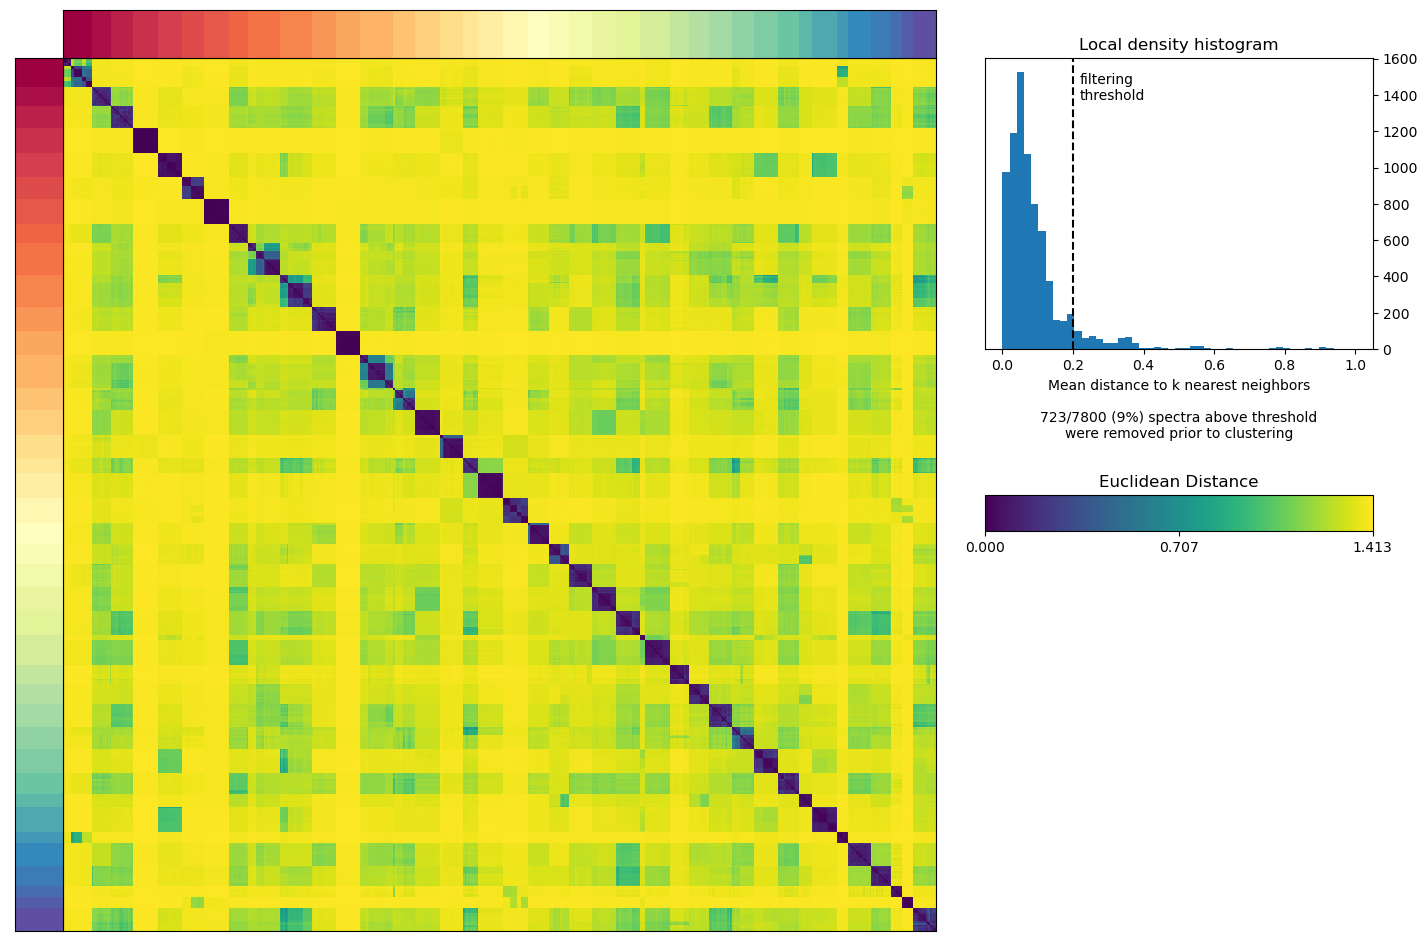

In [240]:
cnmf_obj.consensus(k=39, density_threshold=0.2)

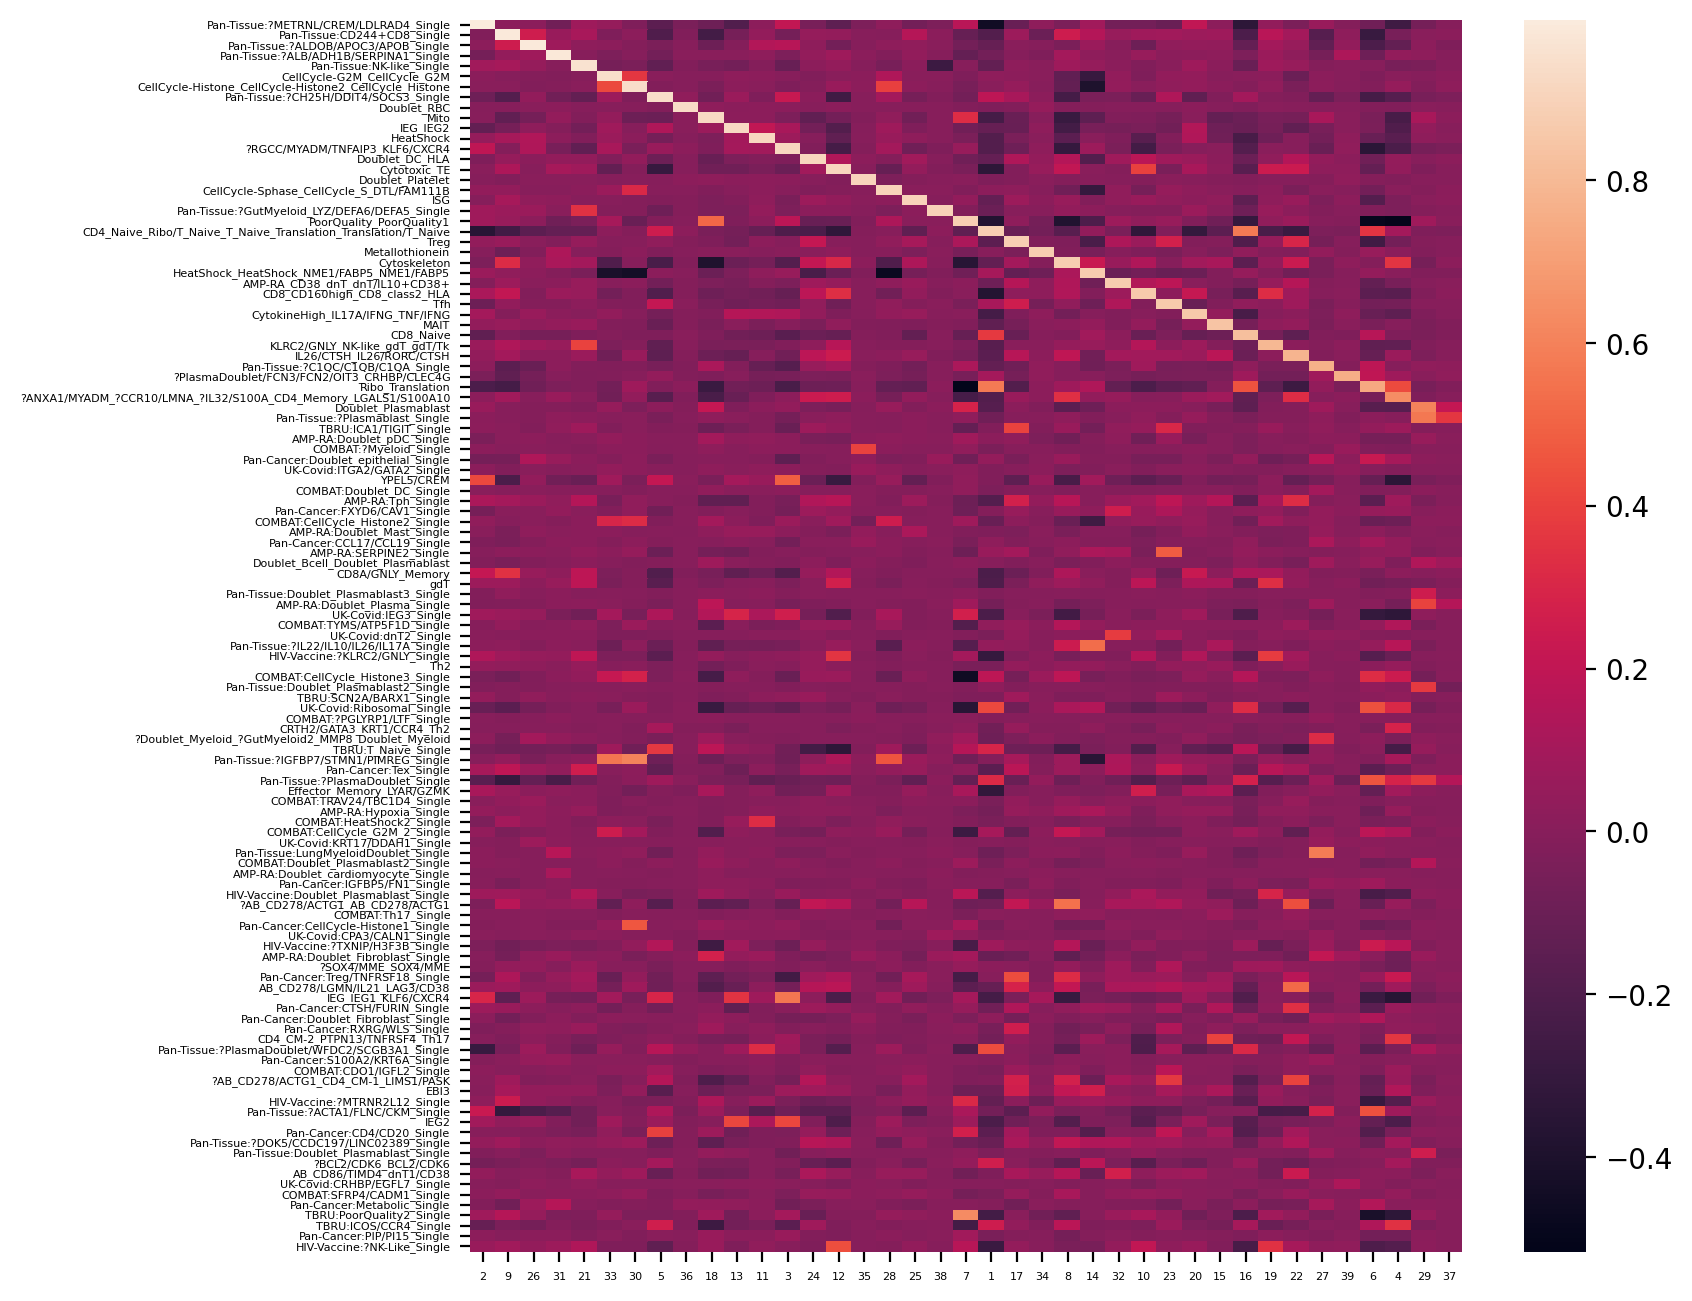

In [238]:
(usage, spectra_scores, spectra_tpm, top_genes) = cnmf_obj.load_results(K=39, density_threshold=0.15)
overlap_genes = list(set(spectra_scores.index).intersection(tcat_spectra_all.index))
mapping, unmatched, R = match_columns(tcat_spectra_all.loc[overlap_genes, :], spectra_scores.loc[overlap_genes, :])
R_for_plot = R.loc[list(mapping['X_columns']) + unmatched, mapping['Y_columns']]
rename_dict = dict(zip(mapping['Y_columns'], mapping['X_columns']))

fig,ax = plt.subplots(1,1, figsize=(8,8), dpi=200)
sns.heatmap(R_for_plot, ax=ax)
ax.set_xticks(np.arange(R_for_plot.shape[1])+0.5)
ax.set_yticks(np.arange(R_for_plot.shape[0])+0.5)
ax.set_xticklabels(R_for_plot.columns, fontsize=4)
_ = ax.set_yticklabels(R_for_plot.index, fontsize=4)

In [245]:
res = []
k=39
merge_annotation = pd.merge(left=mapping, right=clustering, left_on='X_columns', right_index=True, how='outer')
mapping_ref[k] = merge_annotation
total_overlaps = (merge_annotation['R']>R_thresh).sum()
ind = (merge_annotation['R']>R_thresh) & ((~merge_annotation[dataset_cols].isnull()).sum(axis=1)>1)
nonsingleton_overlaps = ind.sum()
this_dataset_singletons_ind = (~merge_annotation[other_dataset_cols].isnull()).sum(axis=1)==0
recur_singleton_ind = this_dataset_singletons_ind & (merge_annotation['R']>R_thresh)
new_singleton_match_ind = ((~merge_annotation[other_dataset_cols].isnull()).sum(axis=1)==1) & (merge_annotation['R']>R_thresh) & merge_annotation[this_datset].isnull()
res.append([k, total_overlaps, nonsingleton_overlaps, this_dataset_singletons_ind.sum(), recur_singleton_ind.sum(), (merge_annotation['R']<R_thresh).sum(), new_singleton_match_ind.sum()])

    
    
res = pd.DataFrame(res, columns=['K', 'Num_GEP_Overlaps', 'Num_TCAT_NonSingletonOverlaps', 'Orig_TCAT_Dataset_Singletons', 'TCAT_Singletons_Found', 'New_Singletons', 'Orig_TCAT_OtherDataset_Singleton_Match'])
res

K  Num_GEP_Overlaps  Num_TCAT_NonSingletonOverlaps  \
0  39                38                             27   

   Orig_TCAT_Dataset_Singletons  TCAT_Singletons_Found  New_Singletons  \
0                            19                      8               1   

   Orig_TCAT_OtherDataset_Singleton_Match  
0                                       0

In [246]:
os.path.abspath(cnmfdir)

'/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas'

In [247]:
name

'XTissue.20230927.NoBlood.Iter200'

In [248]:
os.path.abspath('.')

'/data/srlab1/TCAT/Analysis/PerDataset/XTissueImmuneAtlas'

In [249]:
gep_info = read_dataset_log('GEP_Name')
gep_info.index = gep_info['MetaGep_Name']
gep_info.head()

MetaGep_Name  \
MetaGep_Name                                                                         
CellCycle-G2M_CellCycle_G2M                            CellCycle-G2M_CellCycle_G2M   
ISG                                                                            ISG   
gdT                                                                            gdT   
Metallothionein                                                    Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  CellCycle-Sphase_CellCycle_S_DTL/FAM111B   

                                                            Long_Name  \
MetaGep_Name                                                            
CellCycle-G2M_CellCycle_G2M                      Cell Cycle G2M Phase   
ISG                                       Interferon Stimulated Genes   
gdT                                               Gamma Delta T Blood   
Metallothionein                                       Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B           Cell Cycle S Phase   

                                               Short_Name Needs Review  \
MetaGep_Name                                                             
CellCycle-G2M_CellCycle_G2M                 CellCycle-G2M          NaN   
ISG                                                   ISG          NaN   
gdT                                             gdT-Blood          NaN   
Metallothionein                           Metallothionein          NaN   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B      CellCycle-S          NaN   

                                                   Class  Num_Datasets Flag  
MetaGep_Name                                                                 
CellCycle-G2M_CellCycle_G2M               Known Activity             7  NaN  
ISG                                       Known Activity             7  NaN  
gdT                                        Known Lineage             4  NaN  
Metallothionein                           Known Activity             5  NaN  
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  Known Activity             7  NaN

In [293]:
gep2meta = dict(zip(mapping['Y_columns'], mapping['X_columns']))
meta2rename = dict(zip(gep_info['MetaGep_Name'], gep_info['Short_Name']))
meta2rename['HIV-Vaccine:?TXNIP/H3F3B_Single'] = 'HIV-Vaccine:?TXNIP/H3F3B_Single'
count = 1
gep2rename = {}
for g in gep2meta.keys():
    if gep2meta[g] in meta2rename:
        gep2rename[g] = meta2rename[gep2meta[g]]
    else:
        gep2rename[g] = 'Pan-Tissue:%d' % count
        count += 1

In [295]:
fixmap = {}
fixmap['Pan-Tissue:1'] = 'Pan-Tissue:Digestive/Liver'
fixmap['Pan-Tissue:2'] = 'Pan-Tissue:Liver-Metabolism'
fixmap['Pan-Tissue:3'] = 'Pan-Tissue:Paneth'
fixmap['Pan-Tissue:4'] = 'Pan-Tissue:Macrophage'
fixmap['Pan-Tissue:5'] = 'Pan-Tissue:Plasma'

for g in gep2rename.keys():
    if gep2rename[g] in fixmap.keys():
        gep2rename[g] = fixmap[gep2rename[g]]
        

In [296]:
usage_rename = usage.rename(columns=gep2rename)
spectra_scores_rename = spectra_scores.rename(columns=gep2rename)
spectra_tpm_rename = spectra_tpm.rename(columns=gep2rename)

In [298]:
for dat, lab in [(usage_rename, 'Usage'), (spectra_scores_rename, 'Spectra_Scores'), (spectra_tpm_rename, 'Spectra_TPM')]:
    fn = os.path.join(cnmfdir, name +'.'+lab+'.Relabeled.tsv')
    print(os.path.abspath(fn))
    dat.to_csv(fn, sep='\t')

/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200.Usage.Relabeled.tsv
/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200.Spectra_Scores.Relabeled.tsv
/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/XTissue.20230927.NoBlood.Iter200.Spectra_TPM.Relabeled.tsv


In [299]:
top_genes_relabed = {}
for g in spectra_scores_rename.columns:
    top_genes_relabed[g] = spectra_scores_rename[g].sort_values(ascending=False).iloc[:50].index
    
top_genes_relabed = pd.DataFrame.from_dict(top_genes_relabed).T

In [300]:
top_genes_relabed.iloc[:, :20]

0          1          2         3   \
CD4-Naive                         RPS8      RPS13      RPS12     RPS23   
METRNL/CREM                       CREM     METRNL    LDLRAD4    PARD6G   
RGCC/MYADM                        RGCC      MYADM    TNFAIP3       EZR   
S100A10/LMNA                     TIMP1    S100A11        LTB    S100A4   
CH25H/DDIT4                      CH25H      SOCS3    ZFP36L2     DDIT4   
Translation                      RPS11      RPL23     RPL13A     RPS10   
MALAT1                          MALAT1  LINC-PINT      NEAT1    GOLGB1   
Cytoskeleton                     ACTG1       ACTB       PFN1      CFL1   
CD244/CD8                         CAPG      CD244     HMGCS1      CD8B   
HeatShock1                      HSPA1A   HSP90AA1      HSPD1     HSPH1   
CD8_EM                            GZMK       CMC1       CST7     EOMES   
Cytotoxic                       FGFBP2       GZMH       NKG7      GZMB   
HeatShock2                        NME1        SRM       ENO1     C1QBP   
IEG-Tissue                        IER2       EGR1        FOS       JUN   
MAIT                             IL4I1      IL23R    SLC4A10     CEBPD   
CD8-Naive                    LINC02446      S100B       YBX3     NELL2   
Treg                             FOXP3      IL2RA  LINC01943     CTLA4   
Mito                            MT-CO1     MT-CYB     MT-CO2    MT-CO3   
gdT                            KIR2DL3    KIR3DL1    KIR3DL2     TRDV1   
High-Cytokine                   CCL4L2       CCL4       XCL2      XCL1   
NK-Like-3                       FCER1G       GZMA      KRT81     KRT86   
IL26/CTSH                          MAF       CTSH     COL5A3      FUT7   
Tfh                              CD200       KSR2       MAP7    MS4A6A   
HLA                            HLA-DRA   HLA-DRB1   HLA-DQA1      CD74   
Pan-Tissue:Digestive/Liver       PHGR1       RBP2      ALDOB     FABP1   
ISG                              IFIT3      IFIT2      IFIT1     ISG15   
Pan-Tissue:Macrophage             C1QC       C1QB       C1QA      CD5L   
CellCycle-S                       TYMS      PCLAF        TK1      CDT1   
Doublet-Plasma                  JCHAIN      IGHA1   IGKV3-20      IGKC   
CellCycle-Histone             HIST1H3G   HIST1H4C   HIST1H1B  HIST1H3B   
Pan-Tissue:Liver-Metabolism        ALB   SERPINA1       MT1G     ADH1B   
IL10/CD38                         CAV1      FXYD2      PTPN3      CRYM   
CellCycle-G2M                    UBE2C      CCNB2      CDC20      PLK1   
Metallothionein                   MT2A       MT1X       MT1E      MT1F   
Doublet-Platelet                  PPBP      TUBB1        PF4    CAVIN2   
Doublet-RBC                        HBB       HBA2       HBA1       HBM   
Pan-Tissue:Plasma             IGLV2-23   IGHV3-48   IGHV3-41  IGHV3-21   
Pan-Tissue:Paneth                DEFA5      DEFA6    PLA2G2A     REG3A   
FCN3/FCN2                         FCN3       FCN2      CCL14      OIT3   

                                   4          5         6          7   \
CD4-Naive                        SELL      RPL19     RPL32      RPL29   
METRNL/CREM                    ATP1B3     PTPN22     AUTS2       FTH1   
RGCC/MYADM                       LMNA       PIM3     ANXA1       JUND   
S100A10/LMNA                     EMP3     S100A6   S100A10       LMNA   
CH25H/DDIT4                      EPGN      SOCS1     CMTM8       AREG   
Translation                     RPS17      RPS20    RPL27A       RPL7   
MALAT1                       HIST1H1D      SYNE2     PTPRC  LINC00513   
Cytoskeleton                   CORO1A     ARPC1B      MYL6      COTL1   
CD244/CD8                       ITGAE       ABI3     CD160      TRGV2   
HeatShock1                      HSPE1     DNAJB1     HSPB1     CACYBP   
CD8_EM                         SH2D1A      DTHD1     KLRG1       LYST   
Cytotoxic                        PRF1     FCGR3A    ADGRG1     CX3CR1   
HeatShock2                       NME2      FABP5     EIF5A      PAICS   
IEG-Tissue                       BTG2       JUNB     

In [301]:
adata = sc.read(paths['RNA_Varnorm_Harmony'])

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


In [302]:
adata

AnnData object with n_obs × n_vars = 154314 × 2000
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'Sex', 'Age_range', 'pct_mito', 'n_counts'
    var: 'gene', 'features_renamed', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [303]:
tissue_average = usage_rename.groupby(adata.obs['Organ']).mean()

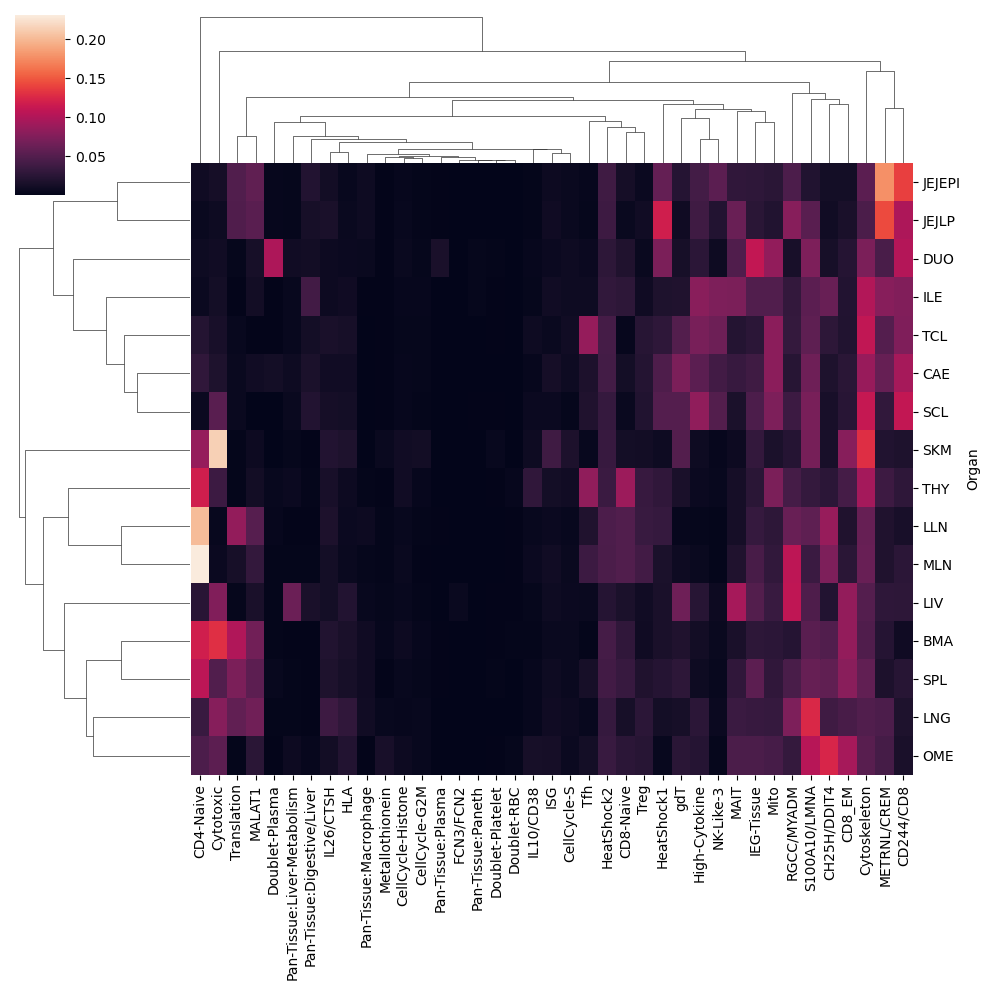

In [304]:
sns.clustermap(tissue_average)

In [305]:
cols = [x for x in usage_rename.columns if 'Pan-Tissue' in x]
tissue_average[cols]

Pan-Tissue:Digestive/Liver  Pan-Tissue:Macrophage  \
Organ                                                       
BMA                       0.000966               0.009573   
CAE                       0.016990               0.000606   
DUO                       0.011548               0.005857   
ILE                       0.040410               0.001308   
JEJEPI                    0.021705               0.008313   
JEJLP                     0.014497               0.008373   
LIV                       0.016057               0.005024   
LLN                       0.001549               0.007667   
LNG                       0.001504               0.010786   
MLN                       0.002574               0.003329   
OME                       0.003814               0.001135   
SCL                       0.021204               0.000094   
SKM                       0.001384               0.000609   
SPL                       0.001803               0.009224   
TCL                       0.012069               0.000785   
THY                       0.002245               0.002397   

        Pan-Tissue:Liver-Metabolism  Pan-Tissue:Plasma  Pan-Tissue:Paneth  
Organ                                                                      
BMA                        0.001071           0.000968           0.000201  
CAE                        0.008989           0.000577           0.000379  
DUO                        0.010619           0.015683           0.002785  
ILE                        0.004985           0.000159           0.003014  
JEJEPI                     0.003031           0.001128           0.000484  
JEJLP                      0.003184           0.001225           0.000574  
LIV                        0.063335           0.000606           0.000465  
LLN                        0.001648           0.001080           0.000440  
LNG                        0.002578           0.000901           0.000253  
MLN                        0.002555           0.000758           0.000182  
OME                        0.008056           0.000151           0.000865  
SCL                        0.006204           0.000146           0.001561  
SKM                        0.003430           0.000199           0.000042  
SPL                        0.002152           0.001252           0.000215  
TCL                        0.004798           0.000271           0.000920  
THY                        0.006744           0.000583           0.000292